# EDA of Building Permits in Los Angeles

Visualizing recent new developments in Los Angeles using building permit data.

Info page with descriptions of features:<br>
https://data.lacity.org/A-Prosperous-City/Building-and-Safety-Permit-Information/yv23-pmwf

## Import Data

In [9]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import os
import sys
sys.path[0] = "../" # Defines path for notebook to call modules

from urllib.request import urlretrieve

pd.set_option("display.max_columns", 100)

In [13]:
filename = 'Building_and_Safety_Permit_Information.csv'
url = 'https://data.lacity.org/api/views/yv23-pmwf/rows.csv'

# Check if dataset is presemt
if filename not in os.listdir('../data/raw/'):
    url = 'https://data.lacity.org/api/views/yv23-pmwf/rows.csv'
    urlretrieve(url, filename)

In [15]:
# Import CSV
df = pd.read_csv('../data/raw/'+filename, parse_dates=['Issue Date', "Status Date"])
df.index.names = ['Index']

/Users/gregory/anaconda3/envs/los_angeles_permits_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Cleaning Data

### Overview of Dataset

In [17]:
df.head()

Assessor Book Assessor Page Assessor Parcel                Tract Block  \
Index                                                                          
0              4317             3             ***           TR 30210-C   NaN   
1              5005            10             017  CHESTERFIELD SQUARE   NaN   
2              5154            23             022        SUN-SET TRACT     D   
3              4404            30             010             TR 12086   NaN   
4              2646            19             011              TR 7158   NaN   

        Lot Reference # (Old Permit #)      PCIS Permit #          Status  \
Index                                                                       
0      LT 1                        NaN  15044-90000-08405  Permit Finaled   
1       465                  16SL57806  16016-70000-02464  Permit Finaled   
2        13                  14VN81535  14016-20000-13092          Issued   
3         2                        NaN  16044-30000-09658  Permit Finaled   
4        11                        NaN  17042-90000-31792  Permit Finaled   

      Status Date        Permit Type         Permit Sub-Type Permit Category  \
Index                                                                          
0      2015-09-10               HVAC  1 or 2 Family Dwelling   No Plan Check   
1      2017-08-01  Bldg-Alter/Repair  1 or 2 Family Dwelling   No Plan Check   
2      2014-08-13  Bldg-Alter/Repair               Apartment      Plan Check   
3      2016-08-29               HVAC  1 or 2 Family Dwelling   No Plan Check   
4      2017-12-28           Plumbing  1 or 2 Family Dwelling   No Plan Check   

       Project Number Event Code Initiating Office Issue Date  Address Start  \
Index                                                                          
0                 NaN        NaN          INTERNET 2015-08-18         1823.0   
1                 NaN        NaN          SOUTH LA 2016-02-04         2122.0   
2                 NaN        NaN          VAN NUYS 2014-08-13          415.0   
3                 NaN        NaN           WEST LA 2016-08-22          315.0   
4                 NaN        NaN          INTERNET 2017-12-26        13640.0   

      Address Fraction Start  Address End Address Fraction End  \
Index                                                            
0                        1/2       1823.0                  1/2   
1                        NaN       2122.0                  NaN   
2                        NaN        415.0                  NaN   
3                        NaN        315.0                  NaN   
4                        NaN      13640.0                  NaN   

      Street Direction Street Name Street Suffix Suffix Direction  \
Index                                                               
0                    S      THAYER           AVE              NaN   
1                    W        54TH            ST              NaN   
2                    S  BURLINGTON           AVE              NaN   
3                    S      OCEANO            DR              NaN   
4                    W      PIERCE            ST              NaN   

      Unit Range Start Unit Range End  Zip Code  \
Index                                             
0                  NaN            NaN   90025.0   
1                  NaN            NaN   90062.0   
2                 1-30           1-30   90057.0   
3                  NaN            NaN   90049.0   
4                  NaN            NaN   91331.0   

                                        Work Description  Valuation  \
Index                                                                 
0                                                    NaN        NaN   
1      General rehabilitation for single family dwell...    40000.0   
2      PHOTOVOLTAIC SOLAR PANELS ON ROOF OF (E) APT BLDG    37000.0   
3                                                    NaN        NaN   
4                                                   

### Reformat column names

Reformating the column names by replacing whitespace with hyphens makes copy/paste easier because you can double-click to highlight the entire name. Other non-letter characters are removed.

In [18]:
# Replace whitespace with underscore
df.columns = df.columns.str.replace(' ', '_')

# Replace hyphen with underscore
df.columns = df.columns.str.replace('-', '_')

# Replace hashtag with No (short for number)
df.columns = df.columns.str.replace('#', 'No')

# Replace forward slash with underscore
df.columns = df.columns.str.replace('/', '_')

# Remove period
df.columns = df.columns.str.replace('.', '')

# Remove open parenthesis
df.columns = df.columns.str.replace('(', '')

# Remove closed parenthesis
df.columns = df.columns.str.replace(')', '')

# Remove apostrophe
df.columns = df.columns.str.replace("'", '')

In [19]:
cols = df.columns.tolist()

In [20]:
cols

['Assessor_Book',
 'Assessor_Page',
 'Assessor_Parcel',
 'Tract',
 'Block',
 'Lot',
 'Reference_No_Old_Permit_No',
 'PCIS_Permit_No',
 'Status',
 'Status_Date',
 'Permit_Type',
 'Permit_Sub_Type',
 'Permit_Category',
 'Project_Number',
 'Event_Code',
 'Initiating_Office',
 'Issue_Date',
 'Address_Start',
 'Address_Fraction_Start',
 'Address_End',
 'Address_Fraction_End',
 'Street_Direction',
 'Street_Name',
 'Street_Suffix',
 'Suffix_Direction',
 'Unit_Range_Start',
 'Unit_Range_End',
 'Zip_Code',
 'Work_Description',
 'Valuation',
 'Floor_Area_LA_Zoning_Code_Definition',
 'No_of_Residential_Dwelling_Units',
 'No_of_Accessory_Dwelling_Units',
 'No_of_Stories',
 'Contractors_Business_Name',
 'Contractor_Address',
 'Contractor_City',
 'Contractor_State',
 'License_Type',
 'License_No',
 'Principal_First_Name',
 'Principal_Middle_Name',
 'Principal_Last_Name',
 'License_Expiration_Date',
 'Applicant_First_Name',
 'Applicant_Last_Name',
 'Applicant_Business_Name',
 'Applicant_Address_1',
 

### Write to Disk

In [ ]:
df.to_csv('../data/interim/'+filename)

## EDA

### Select columns for analysis

In [11]:
permits = df[['Issue_Date', 'Status_Date','Status',
 'Permit_Type',
 'Permit_Sub_Type',
 'Permit_Category','Initiating_Office',
 'Address_Start',
 'Address_Fraction_Start',
 'Address_End',
 'Address_Fraction_End',
 'Street_Direction',
 'Street_Name',
 'Street_Suffix',
 'Suffix_Direction',
 'Unit_Range_Start',
 'Unit_Range_End',
 'Zip_Code',
 'Work_Description',
 'Valuation', 'No_of_Residential_Dwelling_Units',
 'No_of_Stories',
 "Contractors_Business_Name",
 'Contractor_City',
 'Contractor_State',
 'License_Type',
 'License_No','Zone',
 'Occupancy','Council_District',
 'Latitude_Longitude']]

In [12]:
permits.head()

Issue_Date Status_Date          Status        Permit_Type  \
Index                                                             
0     2015-08-18  2015-09-10  Permit Finaled               HVAC   
1     2016-02-04  2017-08-01  Permit Finaled  Bldg-Alter/Repair   
2     2014-08-13  2014-08-13          Issued  Bldg-Alter/Repair   
3     2016-08-22  2016-08-29  Permit Finaled               HVAC   
4     2017-12-26  2017-12-28  Permit Finaled           Plumbing   

              Permit_Sub_Type Permit_Category Initiating_Office  \
Index                                                             
0      1 or 2 Family Dwelling   No Plan Check          INTERNET   
1      1 or 2 Family Dwelling   No Plan Check          SOUTH LA   
2                   Apartment      Plan Check          VAN NUYS   
3      1 or 2 Family Dwelling   No Plan Check           WEST LA   
4      1 or 2 Family Dwelling   No Plan Check          INTERNET   

       Address_Start Address_Fraction_Start  Address_End Address_Fraction_End  \
Index                                                                           
0             1823.0                    1/2       1823.0                  1/2   
1             2122.0                    NaN       2122.0                  NaN   
2              415.0                    NaN        415.0                  NaN   
3              315.0                    NaN        315.0                  NaN   
4            13640.0                    NaN      13640.0                  NaN   

      Street_Direction Street_Name Street_Suffix Suffix_Direction  \
Index                                                               
0                    S      THAYER           AVE              NaN   
1                    W        54TH            ST              NaN   
2                    S  BURLINGTON           AVE              NaN   
3                    S      OCEANO            DR              NaN   
4                    W      PIERCE            ST              NaN   

      Unit_Range_Start Unit_Range_End  Zip_Code  \
Index                                             
0                  NaN            NaN   90025.0   
1                  NaN            NaN   90062.0   
2                 1-30           1-30   90057.0   
3                  NaN            NaN   90049.0   
4                  NaN            NaN   91331.0   

                                        Work_Description  Valuation  \
Index                                                                 
0                                                    NaN        NaN   
1      General rehabilitation for single family dwell...    40000.0   
2      PHOTOVOLTAIC SOLAR PANELS ON ROOF OF (E) APT BLDG    37000.0   
3                                                    NaN        NaN   
4                                                    NaN        NaN   

       No_of_Residential_Dwelling_Units  No_of_Stories  \
Index                                                    
0                                   NaN            NaN   
1                                   NaN            NaN   
2                                   NaN            NaN   
3                                   NaN            NaN   
4                                   NaN            NaN   

                           Contractors_Business_Name Contractor_City  \
Index                                                                  
0      CONDITIONED AIRE MECHANICAL & ENGINEERING INC      NORTHRIDGE   
1                                      OWNER-BUILDER             NaN   
2                        PERMACITY CONSTRUCTION CORP     LOS ANGELES   
3                      E/C HEATING AND AIR CONDITION        VALENCIA   
4                                 TITANIUM POWER INC     LOS ANGELES   

      Contractor_State License_Type  License_No    Zone Occupancy  \
Index                                                               
0                   CA          C20    532440.0  R3-1-O       NaN   
1                  NaN          NaN    

### 3.1 Significant Features Analysis

Each feature is examined one by one for structue, datatypes, missing and incorrect values.

#### 3.1.1 *Status*

Information here:<br>
https://www.permitla.org/ipars/permit_help.cfm

In [13]:
permits.Status.value_counts(dropna=False)

Permit Finaled              691318
Issued                      212727
Permit Expired               54808
CofO Issued                  48373
Permit Closed                13605
Refund Completed              9675
CofC Issued                   2997
CofO in Progress              2625
Refund in Progress            2462
Re-Activate Permit            1305
CofO Corrected                 632
OK for CofC                    312
Permit Withdrawn               157
Permit Revoked                 136
Intent to Revoke                80
OK to Issue CofC                67
Insp Scheduled                  20
No Progress                     20
CofC Corrected                   8
Not Ready for Inspection         3
CofO Superseded                  2
CofO Revoked                     2
Intent to Correct CofC           2
Ready to Issue                   2
TCO Issued                       1
Intent to Revoke CofC            1
Not Ready to Issue               1
Partial Inspection               1
Name: Status, dtype:

Only permits that are labeled "Issued", "Permit Finaled" or "Re-Activate Permit" will be selected from the data for analysis:

In [14]:
permits = permits[(permits.Status == "Issued") | 
                  (permits.Status == "Permit Finaled") | 
                  (permits.Status == "Re-Activate Permit")]
print(permits.Status.value_counts())
print(permits.Status.value_counts(normalize=True))

Permit Finaled        691318
Issued                212727
Re-Activate Permit      1305
Name: Status, dtype: int64
Permit Finaled        0.763592
Issued                0.234967
Re-Activate Permit    0.001441
Name: Status, dtype: float64


**Plot permits by year:**

In [15]:
# Create new columns Year and Month
permits["Year"] = pd.DatetimeIndex(permits["Issue_Date"]).year
permits["Month"] = pd.DatetimeIndex(permits["Issue_Date"]).month

Year
2013    105947
2014    106801
2015    118385
2016    130108
2017    155142
2018    163470
2019    125497
Name: Status, dtype: int64


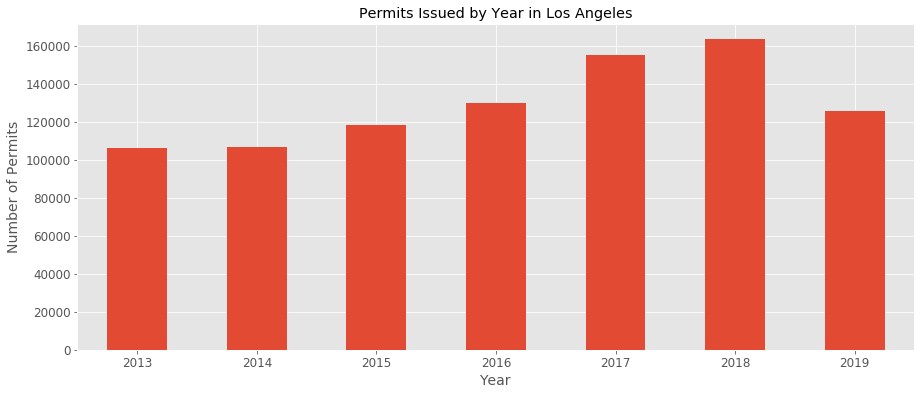

In [18]:
# Group by year and select Status column
permits_by_year = permits.groupby("Year")['Status'].count()
print(permits_by_year)

# build plot
ax = permits_by_year.plot(kind='bar', figsize=(15,6), fontsize=12, linewidth=3, linestyle='-')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Permits", fontsize=14)
plt.title("Permits Issued by Year in Los Angeles")
plt.xticks(rotation=0)
plt.show()

*Note:* Data for years 2019 and 2020 are incomplete.<br>
*Additional Note:* Data is not yet filtered for highrise developments and includes single-family homes.

#### 3.1.2 *Status_Date*

In [19]:
print("Status_Date:")
print(permits.reset_index().groupby("Year")['Status_Date'].count())

# Group by year and select Status column
permits_by_year = permits.reset_index().groupby("Year")['Status'].count()
print("Status: ")
print(permits_by_year)

Status_Date:
Year
2013    105947
2014    106801
2015    118385
2016    130108
2017    155142
2018    163470
2019    125497
Name: Status_Date, dtype: int64
Status: 
Year
2013    105947
2014    106801
2015    118385
2016    130108
2017    155142
2018    163470
2019    125497
Name: Status, dtype: int64


The *Status_Date* data matches the permits issued by year in the *Status* variable.

#### 3.1.3 *Permit_Type*

Information here:
https://www.permitla.org/ipars/permit_help.cfm

In [20]:
print(permits.Permit_Type.value_counts(dropna=False))
print(permits.Permit_Type.value_counts(normalize=True, dropna=False))

Electrical              263300
Bldg-Alter/Repair       213229
Plumbing                180370
HVAC                     93229
Fire Sprinkler           39848
Grading                  20115
Nonbldg-New              16385
Bldg-Addition            16121
Bldg-Demolition          13400
Elevator                 13152
Sign                     12508
Bldg-New                  9501
Swimming-Pool/Spa         7374
Nonbldg-Alter/Repair      4734
Pressure Vessel           1839
Nonbldg-Addition           185
Nonbldg-Demolition          58
Bldg-Relocation              2
Name: Permit_Type, dtype: int64
Electrical              0.290827
Bldg-Alter/Repair       0.235521
Plumbing                0.199227
HVAC                    0.102976
Fire Sprinkler          0.044014
Grading                 0.022218
Nonbldg-New             0.018098
Bldg-Addition           0.017806
Bldg-Demolition         0.014801
Elevator                0.014527
Sign                    0.013816
Bldg-New                0.010494
Swimming-Pool/

#### 3.1.4 *Permit_Sub_Type*

In [21]:
sub_type = permits.Permit_Sub_Type.value_counts(dropna=False)
sub_type_norm = permits.Permit_Sub_Type.value_counts(normalize=True, dropna=False)

print(sub_type)
print(sub_type_norm)

1 or 2 Family Dwelling    495889
Commercial                237768
Apartment                 156569
Onsite                     12205
Special Equipment           1833
Public Safety Only           783
Offsite                      303
Name: Permit_Sub_Type, dtype: int64
1 or 2 Family Dwelling    0.547732
Commercial                0.262626
Apartment                 0.172938
Onsite                    0.013481
Special Equipment         0.002025
Public Safety Only        0.000865
Offsite                   0.000335
Name: Permit_Sub_Type, dtype: float64


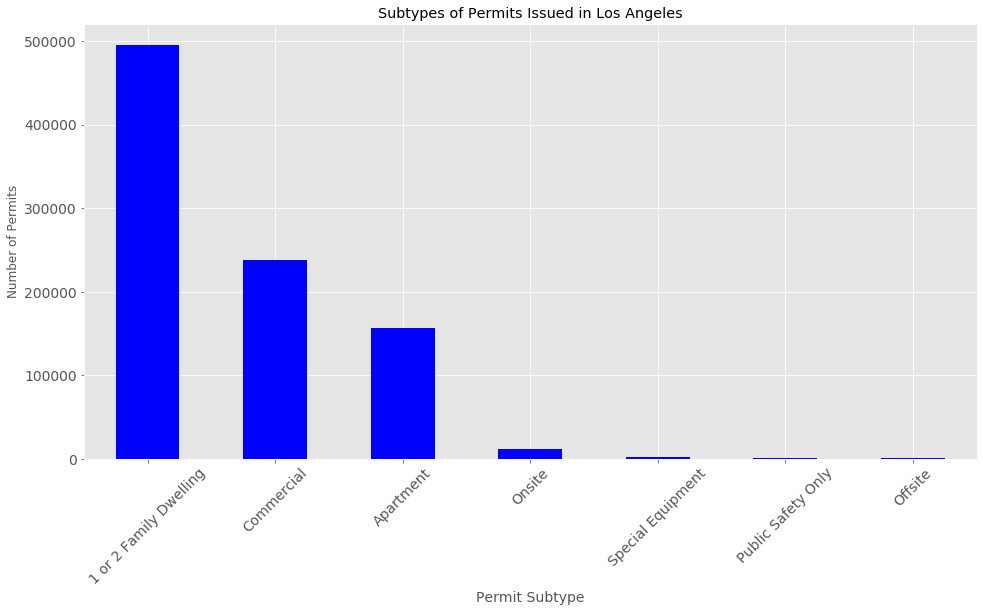

In [23]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=1)

ax = sub_type.plot(kind='bar', fontsize=14, linewidth=3, linestyle='-', color='b')
ax.set_xlabel("Permit Subtype", fontsize=14)
ax.set_ylabel("Number of Permits")
plt.title("Subtypes of Permits Issued in Los Angeles")
plt.xticks(rotation=45)
plt.show()
plt.show()

To generate a clear picture of commercial and residential highrise development, "1 or 2 Family Dwelling" will be excluded:

In [24]:
permits = permits[(permits.Permit_Sub_Type != "1 or 2 Family Dwelling")]
permits.head()

Issue_Date Status_Date          Status        Permit_Type  \
Index                                                             
2     2014-08-13  2014-08-13          Issued  Bldg-Alter/Repair   
7     2016-11-01  2018-06-27  Permit Finaled  Bldg-Alter/Repair   
8     2018-05-21  2018-05-30  Permit Finaled           Plumbing   
16    2014-06-06  2014-08-21  Permit Finaled         Electrical   
17    2015-03-13  2015-08-19  Permit Finaled           Plumbing   

      Permit_Sub_Type Permit_Category Initiating_Office  Address_Start  \
Index                                                                    
2           Apartment      Plan Check          VAN NUYS          415.0   
7           Apartment   No Plan Check           WEST LA         3755.0   
8           Apartment   No Plan Check          VAN NUYS          229.0   
16         Commercial      Plan Check          VAN NUYS         7327.0   
17          Apartment   No Plan Check           WEST LA         8547.0   

      Address_Fraction_Start  Address_End Address_Fraction_End  \
Index                                                            
2                        NaN        415.0                  NaN   
7                        NaN       3755.0                  NaN   
8                        NaN        233.0                  NaN   
16                       NaN       7327.0                  NaN   
17                       NaN       8549.0                  1/2   

      Street_Direction Street_Name Street_Suffix Suffix_Direction  \
Index                                                               
2                    S  BURLINGTON           AVE              NaN   
7                    S      BUTLER           AVE              NaN   
8                    S    CRANDALL            ST              NaN   
16                   W        ELMO            ST              NaN   
17                   W      CASHIO            ST              NaN   

      Unit_Range_Start Unit_Range_End  Zip_Code  \
Index                                             
2                 1-30           1-30   90057.0   
7                1 & 7            NaN   90066.0   
8                  NaN            NaN   90057.0   
16                 NaN            NaN   91042.0   
17                 NaN            NaN   90035.0   

                                        Work_Description  Valuation  \
Index                                                                 
2      PHOTOVOLTAIC SOLAR PANELS ON ROOF OF (E) APT BLDG    37000.0   
7      KITCHEN AND BATHROOM REMODEL FOR RESIDENTIAL B...    12000.0   
8                                                    NaN        NaN   
16     pv2 commercial system. total system size 20kw ...        NaN   
17                                                   NaN        NaN   

       No_of_Residential_Dwelling_Units  No_of_Stories  \
Index                                                    
2                                   NaN            NaN   
7                                   NaN            NaN   
8                                   NaN            NaN   
16                                  NaN            NaN   
17                                  NaN            NaN   

                           Contractors_Business_Name Contractor_City  \
Index                                                                  
2                        PERMACITY CONSTRUCTION CORP     LOS ANGELES   
7                                         AMARO MARK        TORRANCE   
8             L G S COMPLIANCE ALLIANCE RETROFITTING         BURBANK   
16              SOUTHLAND H V A C & CONSTRUCTION INC         TUJUNGA   
17     BEST INTERNATIONAL DEVELOPMENT AND DESIGN INC    SANTA MONICA   

      Contractor_State License_Type  License_No       Zone Occupancy  \
Index                                                                  
2                   CA            B    827864.0       R4-1       NaN   
7                   CA            B    954226.0       R3-1       NaN   
8             

#### 3.1.5 *Permit_Category*

In [25]:
permit_cat = permits.Permit_Category.value_counts(dropna=False)
permit_cat_norm = permits.Permit_Category.value_counts(normalize=True, dropna=False)

print(permit_cat)
print(permit_cat_norm)

No Plan Check    275375
Plan Check       134086
Name: Permit_Category, dtype: int64
No Plan Check    0.67253
Plan Check       0.32747
Name: Permit_Category, dtype: float64


Group by *Permit_Sub_Type* and *Permit_Category*:

In [26]:
permits.groupby(["Permit_Sub_Type", "Permit_Category"])["Permit_Category"].count().to_frame("Count")

Count
Permit_Sub_Type    Permit_Category        
Apartment          No Plan Check    127590
                   Plan Check        28979
Commercial         No Plan Check    145210
                   Plan Check        92558
Offsite            No Plan Check         2
                   Plan Check          301
Onsite             No Plan Check        92
                   Plan Check        12113
Public Safety Only No Plan Check       651
                   Plan Check          132
Special Equipment  No Plan Check      1830
                   Plan Check            3

#### 3.1.6 *Initiating_Office*

In [27]:
print(permits.Initiating_Office.value_counts(dropna=False).to_frame())
print(permits.Initiating_Office.value_counts(normalize=True, dropna=False).to_frame())

          Initiating_Office
METRO                176213
VAN NUYS              97444
INTERNET              79804
WEST LA               30313
SANPEDRO              14815
SOUTH LA              10870
FAX                       2
          Initiating_Office
METRO              0.430354
VAN NUYS           0.237981
INTERNET           0.194900
WEST LA            0.074031
SANPEDRO           0.036182
SOUTH LA           0.026547
FAX                0.000005


#### 3.1.7 *Address_Start, Address_Fraction_Start, Address_End, Address_Fraction_End*

Some developments occupy more than one address.

In [28]:
address = ['Address_Start',
 'Address_Fraction_Start',
 'Address_End',
 'Address_Fraction_End']

permits[address].head()

Address_Start Address_Fraction_Start  Address_End Address_Fraction_End
Index                                                                        
2              415.0                    NaN        415.0                  NaN
7             3755.0                    NaN       3755.0                  NaN
8              229.0                    NaN        233.0                  NaN
16            7327.0                    NaN       7327.0                  NaN
17            8547.0                    NaN       8549.0                  1/2

In [29]:
permits[address].dtypes

Address_Start             float64
Address_Fraction_Start     object
Address_End               float64
Address_Fraction_End       object
dtype: object

In [30]:
# Convert datatype of addresses to int
permits[["Address_Start", "Address_End"]] = permits[["Address_Start", "Address_End"]].fillna(0.0).astype(int)

In [31]:
permits[address].dtypes

Address_Start              int64
Address_Fraction_Start    object
Address_End                int64
Address_Fraction_End      object
dtype: object

In [32]:
# View head of developments with multiple addresses
permits[permits['Address_Start'] != permits['Address_End']].head()

Issue_Date Status_Date          Status        Permit_Type  \
Index                                                             
8     2018-05-21  2018-05-30  Permit Finaled           Plumbing   
17    2015-03-13  2015-08-19  Permit Finaled           Plumbing   
30    2017-07-22  2018-04-05  Permit Finaled               HVAC   
214   2018-07-03  2019-03-06  Permit Finaled           Plumbing   
239   2013-10-18  2014-01-21  Permit Finaled  Bldg-Alter/Repair   

      Permit_Sub_Type Permit_Category Initiating_Office  Address_Start  \
Index                                                                    
8           Apartment   No Plan Check          VAN NUYS            229   
17          Apartment   No Plan Check           WEST LA           8547   
30          Apartment   No Plan Check          INTERNET           2555   
214         Apartment   No Plan Check             METRO          19537   
239         Apartment      Plan Check             METRO           2841   

      Address_Fraction_Start  Address_End Address_Fraction_End  \
Index                                                            
8                        NaN          233                  NaN   
17                       NaN         8549                  1/2   
30                       NaN         2557                  1/2   
214                      NaN        19545                  NaN   
239                      NaN         2845                  NaN   

      Street_Direction Street_Name Street_Suffix Suffix_Direction  \
Index                                                               
8                    S    CRANDALL            ST              NaN   
17                   W      CASHIO            ST              NaN   
30                   E  CINCINNATI            ST              NaN   
214                  W       ASTOR            PL              NaN   
239                  W     LEEWARD           AVE              NaN   

      Unit_Range_Start Unit_Range_End  Zip_Code  \
Index                                             
8                  NaN            NaN   90057.0   
17                 NaN            NaN   90035.0   
30                 NaN            NaN   90033.0   
214                NaN            NaN   91324.0   
239                NaN            NaN   90005.0   

                                        Work_Description  Valuation  \
Index                                                                 
8                                                    NaN        NaN   
17                                                   NaN        NaN   
30                                                   NaN        NaN   
214                                                  NaN        NaN   
239    STRUCTURAL REPAIR TO EXISTING 6-CAR DETACHED G...    15000.0   

       No_of_Residential_Dwelling_Units  No_of_Stories  \
Index                                                    
8                                   NaN            NaN   
17                                  NaN            NaN   
30                                  NaN            NaN   
214                                 NaN            NaN   
239                                 NaN            NaN   

                           Contractors_Business_Name      Contractor_City  \
Index                                                                       
8             L G S COMPLIANCE ALLIANCE RETROFITTING              BURBANK   
17     BEST INTERNATIONAL DEVELOPMENT AND DESIGN INC         SANTA MONICA   
30                           MARCOS CONSTRUCTION INC          LOS ANGELES   
214                                  S H S C G C INC               WALNUT   
239                               Y 2 M CONSTRUCTION  RANCHO PALOS VERDES   

      Contractor_State License_Type  License_No        Zone Occupancy  \
Index                                                                   
8                   CA          C36    900919.0        R3-1       NaN   
17                  CA            B    758846.0 

#### 3.1.8 *Street_Direction, Street_Name, Street_Suffix, Suffix_Direction*

*Street_Direction* and *Suffix_Direction* will be analyzed individually. *Street_Name* and *Street_Suffix* are not analyzed individually, but have missing values that will be important to handle when combining them.<br>

After fixing errors and null values, all of these columns will be combined to create new columns:
* *Full_Street_Name* to investigate which streets have a lot of construction activity
* *Full_Street_Address* with the house number *(Address_Start)*, to investigate multiple permits per address
* *Complete_Street_Address* to facilitate geocoding for missing GPS coordinates



In [33]:
# Select columns
street = ['Street_Direction',
 'Street_Name',
 'Street_Suffix',
 'Suffix_Direction']

#View head of specific columns
permits[street].head()

Street_Direction Street_Name Street_Suffix Suffix_Direction
Index                                                            
2                    S  BURLINGTON           AVE              NaN
7                    S      BUTLER           AVE              NaN
8                    S    CRANDALL            ST              NaN
16                   W        ELMO            ST              NaN
17                   W      CASHIO            ST              NaN

#### *Street_Direction*
Interesting fact, the majority of street names in this dataset contain 'West':

In [34]:
# Perform value counts of Street_Direction
permits['Street_Direction'].value_counts(normalize=True, dropna=False)

W      0.430573
S      0.273254
N      0.223621
E      0.051543
NaN    0.021008
Name: Street_Direction, dtype: float64

#### *Suffix_Direction*

These columns have incorrect values to address:

In [35]:
permits.Suffix_Direction.value_counts(dropna=False)

NaN      403827
EAST       3033
WEST       1166
EAS         526
NORTH       328
SOUTH       262
WES         154
NORT         79
NOR          34
W            31
SOU          11
SOUT          8
SO            2
Name: Suffix_Direction, dtype: int64

In [36]:
# Create dictionary to correct suffixes
correct_suffix = {"EAST":"EAST", "WEST":"WEST", "NORTH":"NORTH", "SOUTH":"SOUTH", "EAS":"EAST", "WES":"WEST", "NORT":"NORTH", "NOR":"NORTH", 
                  "W":"WEST", "SOU":"SOUTH", "SOUT":"SOUTH", "SO":"SOUTH"}

# Apply dictionary to column
permits['Suffix_Direction'] = permits.Suffix_Direction.map(correct_suffix)

In [37]:
permits['Suffix_Direction'].value_counts(dropna=False).to_frame()

Suffix_Direction
NaN              403827
EAST               3559
WEST               1351
NORTH               441
SOUTH               283

**Null Counts:** *Street_Direction, Street_Name, Street_Suffix, Suffix_Direction* 

In [38]:
print("Individual null counts:")
print("Street_Direction: {}".format(permits.Street_Direction.isnull().sum()))
print("Street_Name: {}".format(permits.Street_Name.isnull().sum()))
print("Street_Suffix: {}".format(permits.Street_Suffix.isnull().sum()))
print("Suffix_Direction: {}".format(permits.Suffix_Direction.isnull().sum()))

Individual null counts:
Street_Direction: 8602
Street_Name: 2
Street_Suffix: 11266
Suffix_Direction: 403827


**New Feature:** *Full_Street_Name*

Combining *Street_Name*, *Street_Direction, Street_Name*, and *Street_Suffix* to create new feature *Full_Street_Name*. Missing values will cause trouble, so they are temporarily replaced with "-" which is removed after the concatenation:

In [39]:
# Use hyphen string as place holder for NaN values so that strings can be easily added together
permits[street] = permits[street].fillna("-")

# Add together strings Street_Direction, Street_Name and Street_Suffix
Full_Street_Name = permits.Street_Direction + " " + permits.Street_Name + " " + permits.Street_Suffix + " " + permits.Suffix_Direction

# Remove inserted hyphens and replace with no space
Full_Street_Name = Full_Street_Name.str.replace("-", "")

# Remove whitespace at end
Full_Street_Name = Full_Street_Name.str.rstrip()

# Add Full_Street_Name feature to dataset
permits["Full_Street_Name"] = Full_Street_Name
print(permits.Full_Street_Name.head())

# Check for NaN values
print("Null values in Full_Street_Name: {}".format(permits.Full_Street_Name.isnull().sum()))

Index
2     S BURLINGTON AVE
7         S BUTLER AVE
8        S CRANDALL ST
16           W ELMO ST
17         W CASHIO ST
Name: Full_Street_Name, dtype: object
Null values in Full_Street_Name: 0


Using *Full_Street_Name* let's us group the number of permits issued by street.

In [40]:
# Create dataframe of street names counts
address_counts = pd.DataFrame(Full_Street_Name.value_counts(dropna=False)).reset_index()
address_counts.columns = ['Full_Street_Name', 'Permits']

# View head
address_counts.head()

Full_Street_Name  Permits
0      W WILSHIRE BLVD    15417
1       W VENTURA BLVD     9889
2        S FIGUEROA ST     8396
3            WORLD WAY     7199
4  W SANTA MONICA BLVD     6598

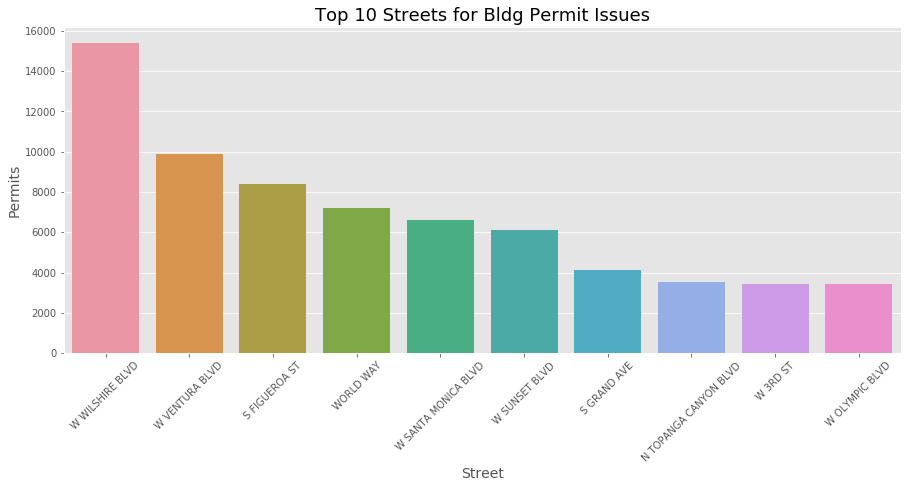

In [41]:
# Plot streets with most permits issued, an indicator for construction activity
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.barplot(x="Full_Street_Name", y="Permits", data=address_counts.head(10),
            label="Full_Street_Name")
ax.set_xlabel("Street",fontsize=14)
ax.set_ylabel("Permits",fontsize=14)
plt.xticks(rotation=45)
ax.set_title("Top 10 Streets for Bldg Permit Issues", fontsize=18)
plt.show()


Later in the analysis we will address missing values for GPS coordinates. In order to geocode missing GPS coordinates we must have the full street address. *Full_Street_Address* will be created with the complete address of the construction:

In [42]:
# Add Address_Start to Full_Street_Name to create new column of Full_Street_Address
permits['Full_Street_Address'] = permits['Address_Start'].astype(str) + " " + permits['Full_Street_Name']
print(permits['Full_Street_Address'].head())

# Create dataframe of street names counts
full_address_counts = pd.DataFrame(permits['Full_Street_Address'].value_counts()).reset_index()
full_address_counts.columns = ['Full_Street_Address', 'Permits']

# View head
full_address_counts.head()

Index
2     415 S BURLINGTON AVE
7        3755 S BUTLER AVE
8        229 S CRANDALL ST
16          7327 W ELMO ST
17        8547 W CASHIO ST
Name: Full_Street_Address, dtype: object


Full_Street_Address  Permits
0   10250 W SANTA MONICA BLVD     2928
1              380  WORLD WAY     1972
2  6600 N TOPANGA CANYON BLVD     1177
3         8500 W BEVERLY BLVD     1029
4              200  WORLD WAY     1004

In [43]:
# Add Zip Code
permits['Full_Street_Address_Zip_State'] = permits['Full_Street_Address'] + ", " + permits['Zip_Code'].fillna(0.0).astype(int).astype(str) + ", CA, USA"

# Fix whitespace
permits['Full_Street_Address_Zip_State'] = permits['Full_Street_Address_Zip_State'].str.replace(" ,", ",")

# View
permits['Full_Street_Address_Zip_State'].head()


Index
2     415 S BURLINGTON AVE, 90057, CA, USA
7        3755 S BUTLER AVE, 90066, CA, USA
8        229 S CRANDALL ST, 90057, CA, USA
16          7327 W ELMO ST, 91042, CA, USA
17        8547 W CASHIO ST, 90035, CA, USA
Name: Full_Street_Address_Zip_State, dtype: object

In [44]:
# Check for missing values in Full_Street_Address
print("Full_Street_Address Missing values: {}".format(permits['Full_Street_Address'].isnull().sum()))
print("Full_Street_Address_Zip_State Missing values: {}".format(permits['Full_Street_Address_Zip_State'].isnull().sum()))

Full_Street_Address Missing values: 0
Full_Street_Address_Zip_State Missing values: 0


Using *Full_Street_Address* it is possible to visualize the locations with the most permits issued:

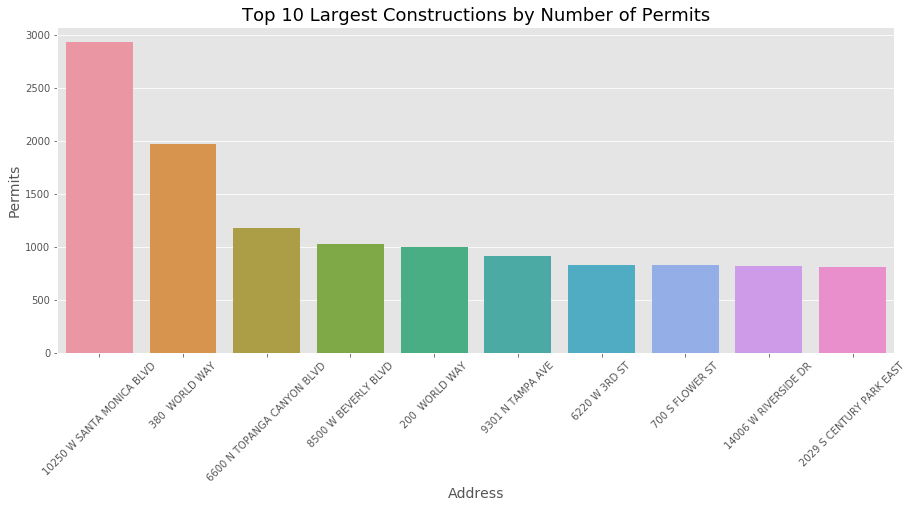

In [45]:
# Create plot of addresses with high amount of construction
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.barplot(x="Full_Street_Address", y="Permits", data=full_address_counts.head(10),
            label="Full_Street_Address")
ax.set_xlabel("Address",fontsize=14)
ax.set_ylabel("Permits",fontsize=14)
plt.xticks(rotation=45)
ax.set_title("Top 10 Largest Constructions by Number of Permits", fontsize=18)
plt.show()

Note: These are not grouped by year, and can refer to permits issued over a period of several years. For a more accurate picture of ongoing construction in any one period, permits for addresses should be grouped by year. With this anlaysis it would be possible to estimate approxiamately how many years it took for a construction to complete.

**Permit Counts for Individual Construction Sites**

In [46]:
# Create dataframe of address sites grouped by year and with more than n permits
n_permits = 20
full_address_counts_by_year = permits.groupby("Year")['Full_Street_Address'].value_counts().sort_index().to_frame("Permits")
full_address_counts_by_year[full_address_counts_by_year.Permits > n_permits]


Permits
Year Full_Street_Address                  
2013 1  WORLD WAY                       23
     1 S LMU DR                         39
     1000 W ELYSIAN PARK AVE           143
     1000 W WILSHIRE BLVD               25
     101 N OCEAN AVE                    22
     101 S LA BREA AVE                  33
     10100 W SANTA MONICA BLVD          39
     1011 S FIGUEROA ST                 27
     1020 S FIGUEROA ST                 21
     10201 W PICO BLVD                  56
     10250 W CONSTELLATION BLVD         30
     10250 W SANTA MONICA BLVD         115
     1026 W 34TH ST                     32
     10430 W WILSHIRE BLVD              24
     10450 W WILSHIRE BLVD              25
     1055 W 7TH ST                      55
     10660 W WILSHIRE BLVD              33
     10700 W SANTA MONICA BLVD          53
     10727 W WILSHIRE BLVD              27
     10960 W WILSHIRE BLVD              21
     10995 N LEHIGH AVE                 61
     111 E UNIVERSAL HOLLYWOOD DR       76
     11100 W SANTA MONICA BLVD          35
     11111 W SANTA MONICA BLVD          60
     11150 W OLYMPIC BLVD               33
     11150 W SANTA MONICA BLVD          54
     11175 W SANTA MONICA BLVD          52
     11400 W OLYMPIC BLVD               25
     11444 W OLYMPIC BLVD               24
     11601 W WILSHIRE BLVD              86
...                                    ...
2019 687 S HOBART BLVD                  32
     6922 W HOLLYWOOD BLVD              31
     700 S FLOWER ST                   104
     700 W 7TH ST                       46
     7007 W ROMAINE ST                  43
     707 W WILSHIRE BLVD                41
     725 S FIGUEROA ST                  58
     750 S GARLAND AVE                  50
     7540  WORLD WAY                    21
     7660 W BEVERLY BLVD                46
     767 S ALAMEDA ST                   64
     777 S FIGUEROA ST                  86
     7843 N LANKERSHIM BLVD             22
     800 W 1ST ST                       55
     800 W 6TH ST                       46
     801 S FIGUEROA ST                  61
     801 S GRAND AVE                    23
     832 N ALTA VISTA BLVD              30
     8500 N BALBOA BLVD                 59
     8500 W BEVERLY BLVD                85
     865 S COMSTOCK AVE                 26
     865 S FIGUEROA ST                  21
     900 N ALAMEDA ST                   24
     9217 S AIRPORT BLVD                28
     9301 N TAMPA AVE                   34
     953 N SYCAMORE AVE                 49
     959 N SEWARD ST                    45
     963 E 4TH ST                       30
     970 W 190TH ST                     40
     990 W 190TH ST                     41

[1772 rows x 1 columns]

Unstacking and transposing the dataframe will make it easier to understand:

In [47]:
# Create dataframe of permit activity across multiple years
years = ["2013", "2014", "2015", "2016", "2017", "2018", "2019"]
multiple_years = full_address_counts_by_year.unstack().fillna(0).astype(int)
multiple_years = multiple_years.T.reset_index()
multiple_years = multiple_years.drop("level_0", axis=1)
multiple_years.index = multiple_years.index.rename("Index")
multiple_years.columns = ['Full_Street_Address'] + years
multiple_years["Permits_Sum"] = multiple_years[years].sum(axis=1)

# View construction sites with high activity for multiple years
Top_Constructions = multiple_years.sort_values(by="Permits_Sum", ascending=False).head(8)
Top_Constructions

Full_Street_Address  2013  2014  2015  2016  2017  2018  2019  \
Index                                                                         
1556    10250 W SANTA MONICA BLVD   115    20   103   299  1764   476   151   
46972              380  WORLD WAY   530   310   229   207   271   243   182   
64927  6600 N TOPANGA CANYON BLVD   251   179   155   118   195   148   131   
74540         8500 W BEVERLY BLVD   141   152    91   129   230   201    85   
31280              200  WORLD WAY    41   141   363   117   150   128    64   
78016            9301 N TAMPA AVE   160   201   127   145   129   123    34   
62770               6220 W 3RD ST    33    22    25   353   376    23     2   
66696             700 S FLOWER ST    24    76   133   180   159   153   104   

       Permits_Sum  
Index               
1556          2928  
46972         1972  
64927         1177  
74540         1029  
31280         1004  
78016          919  
62770          834  
66696          829

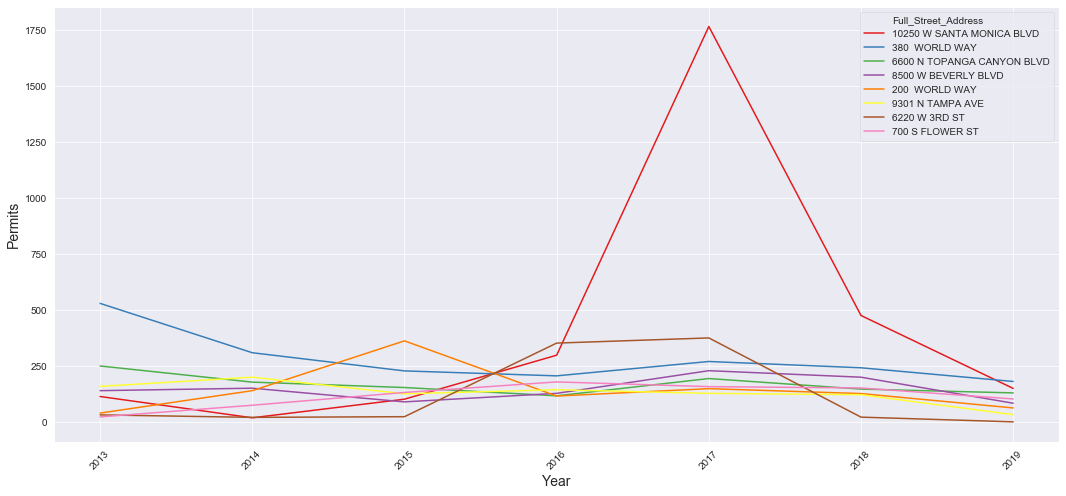

In [51]:
# Plot Top Constructions
sns.set_style("darkgrid")
colors = sns.color_palette("Set1", 8)

Top_Constructions_melt = Top_Constructions.drop("Permits_Sum", axis=1).melt('Full_Street_Address', var_name='Year', value_name='Permits')

fig, ax = plt.subplots(figsize=(18,8))
ax = sns.lineplot(x="Year", y="Permits", hue='Full_Street_Address', data=Top_Constructions_melt, palette=colors)
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Permits",fontsize=14)
plt.xticks(rotation=45)
#sns.set_context(rc={"lines.linewidth": 2})
plt.show()

Now that *Full_Street_Name* and *Full_Street_Address* have been created, it is possible to examine which streets have multiple construction sites, i.e., streets with more than one address with building permit applications. This subset of the data will show which streets have a lot of construction occurring.

**Grouping Construction Sites by Street**

In [52]:
# Find streets with multiple construction sites
n_permits = 20
multiple_sites = permits.groupby('Full_Street_Name')['Full_Street_Address'].value_counts().sort_index(ascending=False).to_frame("Permits")
print("Length of subset data: {}".format(multiple_sites[multiple_sites.Permits > n_permits].shape))
multiple_sites[multiple_sites.Permits > n_permits]


Length of subset data: (2463, 1)


Permits
Full_Street_Name    Full_Street_Address              
W ZOO DR            5333 W ZOO DR                  37
W YOSEMITE DR       2245 W YOSEMITE DR             21
W WYANDOTTE ST      19424 W WYANDOTTE ST           23
W WORLD WAY         700 W WORLD WAY                65
                    600 W WORLD WAY                44
                    500 W WORLD WAY                80
                    400 W WORLD WAY                82
                    380 W WORLD WAY               381
                    300 W WORLD WAY                42
                    100 W WORLD WAY                65
W WILSHIRE BLVD     915 W WILSHIRE BLVD           213
                    900 W WILSHIRE BLVD           392
                    835 W WILSHIRE BLVD            22
                    811 W WILSHIRE BLVD           158
                    800 W WILSHIRE BLVD           144
                    707 W WILSHIRE BLVD           450
                    700 W WILSHIRE BLVD            50
                    6505 W WILSHIRE BLVD           24
                    6500 W WILSHIRE BLVD          204
                    6420 W WILSHIRE BLVD          195
                    6404 W WILSHIRE BLVD           22
                    6399 W WILSHIRE BLVD           39
                    637 W WILSHIRE BLVD            23
                    6300 W WILSHIRE BLVD          263
                    626 W WILSHIRE BLVD            47
                    6245 W WILSHIRE BLVD          106
                    6222 W WILSHIRE BLVD           42
                    6200 W WILSHIRE BLVD           36
                    6100 W WILSHIRE BLVD           22
                    6067 W WILSHIRE BLVD          106
...                                               ...
 WORLD WAY WEST     7300  WORLD WAY WEST           35
                    7157  WORLD WAY WEST           21
                    7100  WORLD WAY WEST           34
                    7002  WORLD WAY WEST           32
                    7001  WORLD WAY WEST           40
 WORLD WAY          800  WORLD WAY                189
                    7540  WORLD WAY                42
                    701  WORLD WAY                 28
                    700  WORLD WAY                597
                    651  WORLD WAY                 22
                    600  WORLD WAY                470
                    500  WORLD WAY                720
                    401  WORLD WAY                 55
                    400  WORLD WAY                504
                    380  WORLD WAY               1972
                    301  WORLD WAY                 52
                    300  WORLD WAY                510
                    201  WORLD WAY                 38
                    200  WORLD WAY               1004
                    101  WORLD WAY                 31
                    100  WORLD WAY                756
                    1  WORLD WAY                   90
 CENTURY PARK  EAST 2170  CENTURY PARK  EAST       37
                    2080  CENTURY PARK  EAST       21
                    2049  CENTURY PARK  EAST       28
                    2029  CENTURY PARK  EAST       25
                    1888  CENTURY PARK  EAST       75
                    1875  CENTURY PARK  EAST       53
                    1801  CENTURY PARK  EAST       61
                    1800  CENTURY PARK  EAST       34

[2463 rows x 1 columns]

#### 3.1.9 *Unit_Range_Start, Unit_Range_End*

In [53]:
not_null = permits[(permits.Unit_Range_Start.notnull() == 1)][["Unit_Range_Start", "Unit_Range_End"]]
not_null.head()

Unit_Range_Start Unit_Range_End
Index                                
2                 1-30           1-30
7                1 & 7            NaN
18                1001            NaN
20                 #01            NaN
46          SPACE #650            NaN

Thes permits are for individual units, not whole buildings. They probably aren't relevant to the investigation in that case, since we are interested in new building construction.

In [54]:
# Group Unit_Range_Start by Permit_Type
permits.groupby("Permit_Type")["Unit_Range_Start"].count().to_frame()

Unit_Range_Start
Permit_Type                           
Bldg-Addition                      193
Bldg-Alter/Repair                31289
Bldg-Demolition                    388
Bldg-New                           557
Electrical                       54541
Elevator                          2052
Fire Sprinkler                   10871
Grading                            502
HVAC                             26922
Nonbldg-Addition                     3
Nonbldg-Alter/Repair                85
Nonbldg-Demolition                   1
Nonbldg-New                        512
Plumbing                         35883
Pressure Vessel                    330
Sign                              1877
Swimming-Pool/Spa                   51

According to the counts, some new constructions (Bldg-New) have entries in *Unit_Range_Start*, so it will not be deleted.

#### 3.1.10 *Zip_Code*

In [55]:
# Check data type
permits.Zip_Code.dtypes

dtype('float64')

In [56]:
# Convert data type to integer
permits['Zip_Code'] = permits['Zip_Code'].fillna(0.0).astype(int)
permits.Zip_Code.dtypes

dtype('int64')

In [57]:
# View Top 5 Zip Codes for building permits
permits.Zip_Code.value_counts().sort_values(ascending=False).to_frame("Count").head()

Count
90045  16164
90025  11718
90017  11440
90067  10774
90028   9670

#### 3.1.11 *Work_Description*

In [58]:
# Set column width for readability
pd.set_option('max_colwidth', -1)
permits['Work_Description'].value_counts(dropna=False).head(20)

NaN                                                                       262084
Re-roof with Class A or B material weighing less than 6 pound per sq.     2371  
Re-roof with Class A or B material weighing less than 6 pounds per sq.    2305  
Kitchen/bathroom remodel for residential buildings (no structural chan    700   
RE-ROOF WITH CLASS A OR B MATERIAL WEIGHING LESS THAN 6 POUNDS PER SQ.    654   
Kitchen remodel for residential buildings (no structural changes).        461   
Re-roof with Class A or B roof covering material weighing less than 6     317   
Bathroom remodel for residential buildings (no structural changes).       311   
Bathroom (1) remodel for residential buildings (no structural changes)    261   
Add sill plate anchors bolts and cripple wall plywood per L.A. City St    200   
BATHROOM REMODEL FOR RESIDENTIAL BUILDINGS (NO STRUCTURAL CHANGES).       183   
KITCHEN AND BATHROOM REMODEL FOR RESIDENTIAL BUILDINGS (NO STRUCTURAL     178   
CHANGE OF CONTRACTOR        

#### 3.1.12 *Valuation*

Valuation is the value of the construction in order to determine the permit fee before issue. 

In [80]:
print("Valuation Missing Values: {}".format(permits.Valuation.isnull().sum()))

Valuation Missing Values: 299422


In [81]:
permits[permits['Valuation'].notnull() == 1]["Valuation"].to_frame("Valuation").head()

Valuation
Index           
2     37000.00  
7     12000.00  
18    10000.00  
40    0.00      
45    125100.00

In [83]:
permits['Valuation'].dtypes

dtype('float64')

In [84]:
# Set decimal float to display dollar values
pd.set_option('display.float_format', lambda x: '%.2f' % x)
permits['Valuation'].describe()

count   110039.00   
mean    334478.30   
std     5173013.30  
min     0.00        
25%     2000.00     
50%     10000.00    
75%     40000.00    
max     583800300.00
Name: Valuation, dtype: float64

In [85]:
# Valuation by category
permits.groupby("Permit_Type")["Valuation"].sum().sort_values(ascending=False)

Permit_Type
Bldg-New               11430077887.40
Bldg-Alter/Repair      10158626142.59
Plumbing               4976107898.55 
HVAC                   2613517013.00 
Fire Sprinkler         2559224250.00 
Elevator               1851968284.00 
Bldg-Addition          1822282780.90 
Nonbldg-New            803224206.94  
Electrical             195481256.00  
Nonbldg-Alter/Repair   147579152.50  
Bldg-Demolition        102542657.00  
Sign                   98038836.41   
Grading                24932414.89   
Swimming-Pool/Spa      19379902.00   
Nonbldg-Addition       2091822.00    
Nonbldg-Demolition     583257.00     
Pressure Vessel        0.00          
Name: Valuation, dtype: float64

Total valuation by year:

In [79]:
# Group by Year
yearly_valuation = permits.groupby("Year")['Valuation'].sum()
yearly_valuation.apply(lambda x: str(round(x/1E9, 2))+" Billion").to_frame("Valuation_by_Year")

Valuation_by_Year
Year                  
2013  2.99 Billion    
2014  2.85 Billion    
2015  4.98 Billion    
2016  4.53 Billion    
2017  6.29 Billion    
2018  9.68 Billion    
2019  5.48 Billion

In [87]:
# Create helper function to format Valuation with thousands, millions and billions
def reformat_large_tick_values(tick_val, pos):
    """
    Reformats values in thousands, millions and billions to show corresponding letter instead of zeros.
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:} billion'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:} million'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:} thousand'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val
        
    # make new tick format into string
    new_tick_format = str(new_tick_format)
    
    return new_tick_format

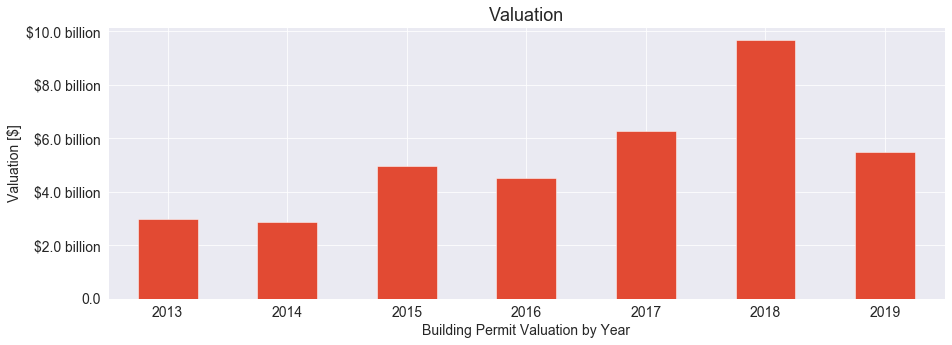

In [88]:
# Create plot of Valuation
fig, ax = plt.subplots(figsize=(15,5))

# Format y-axis numbers
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax = yearly_valuation.plot(kind="bar", fontsize=14)
plt.xticks(rotation=0)
ax.set_ylabel("Valuation [$]", fontsize=14)
ax.set_xlabel("Building Permit Valuation by Year", fontsize=14)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(reformat_large_tick_values))
ax.set_title("Valuation", fontsize=18)
plt.show()

**Most Expensive Location:**

In [92]:
# Max of Valuation
permits[permits.Valuation == permits.Valuation.max()][['Work_Description', 'Valuation']]

Work_Description  \
Index                                                                            
356927  LAX Terminal 3 Renovation (Phase I)  - Demolish and replace portion of   

          Valuation  
Index                
356927 583800300.00

**Valuation: Feature Engineering**

Two new features:
* *Valuation_String*: includes text string for easy readability in graphs and maps
* *Valuation_Millions*: divided by one million for easier readability 

In [93]:
# Create helper function to format Valuation with thousands, millions and billions
def reformat_values(tick_val):
    """
    Reformats values in thousands, millions and billions to show corresponding letter instead of zeros.
    """
    if tick_val >= 1000000000:
        val = round(tick_val/10**9, 1)
        new_tick_format = '${:} billion'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/10**6, 1)
        new_tick_format = '${:} million'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/10**3, 1)
        new_tick_format = '${:} thousand'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val
        
    # make new tick format into string
    new_tick_format = str(new_tick_format)
    
    return new_tick_format

In [94]:
# Create Valuation_String
permits["Valuation_String"] = permits["Valuation"].apply(reformat_values)

# Create Valuation_Millions
permits["Valuation_Millions"] = permits["Valuation"].div(10**6)

In [95]:
permits

Issue_Date Status_Date          Status        Permit_Type  \
Index                                                               
2       2014-08-13 2014-08-13   Issued          Bldg-Alter/Repair   
7       2016-11-01 2018-06-27   Permit Finaled  Bldg-Alter/Repair   
8       2018-05-21 2018-05-30   Permit Finaled  Plumbing            
16      2014-06-06 2014-08-21   Permit Finaled  Electrical          
17      2015-03-13 2015-08-19   Permit Finaled  Plumbing            
18      2013-12-10 2014-01-30   Permit Finaled  Bldg-Alter/Repair   
20      2019-04-01 2019-04-22   Permit Finaled  Plumbing            
24      2017-03-22 2017-06-12   Permit Finaled  Elevator            
29      2018-01-26 2018-06-07   Permit Finaled  Electrical          
30      2017-07-22 2018-04-05   Permit Finaled  HVAC                
31      2016-10-19 2017-05-08   Permit Finaled  Plumbing            
40      2018-11-29 2018-11-29   Permit Finaled  Bldg-Alter/Repair   
42      2013-08-13 2013-10-04   Permit Finaled  Electrical          
44      2015-03-05 2016-02-12   Permit Finaled  Plumbing            
45      2018-08-29 2018-09-19   Permit Finaled  HVAC                
46      2015-07-07 2015-07-24   Permit Finaled  Electrical          
47      2018-04-03 2018-04-05   Permit Finaled  Electrical          
49      2016-05-03 2016-07-08   Permit Finaled  Bldg-Alter/Repair   
51      2018-10-30 2018-10-30   Issued          Plumbing            
54      2017-09-27 2017-10-18   Permit Finaled  Plumbing            
55      2018-04-12 2018-04-12   Issued          Electrical          
56      2018-01-29 2018-02-01   Permit Finaled  Plumbing            
60      2016-07-14 2017-03-15   Permit Finaled  Elevator            
62      2016-08-26 2018-01-17   Permit Finaled  Electrical          
63      2019-05-22 2019-06-11   Permit Finaled  Plumbing            
66      2013-11-19 2015-05-19   Permit Finaled  Bldg-Alter/Repair   
67      2013-07-03 2013-07-08   Permit Finaled  Plumbing            
68      2013-01-16 2013-05-21   Permit Finaled  Bldg-Alter/Repair   
69      2018-02-28 2018-02-28   Issued          Elevator            
70      2019-06-27 2019-06-27   Issued          Electrical          
...            ...        ...      ...               ...            
1041280 2013-07-31 2013-08-29   Permit Finaled  Plumbing            
1041282 2016-01-05 2016-03-02   Permit Finaled  Electrical          
1041283 2014-03-28 2014-05-06   Permit Finaled  HVAC                
1041285 2015-08-27 2015-09-28   Permit Finaled  HVAC                
1041287 2018-09-07 2018-09-14   Permit Finaled  Electrical          
1041289 2018-12-10 2018-12-18   Permit Finaled  Electrical          
1041290 2014-08-21 2014-10-14   Permit Finaled  Plumbing            
1041291 2014-05-22 2014-10-23   Permit Finaled  Fire Sprinkler      
1041293 2013-05-20 2013-06-10   Permit Finaled  Electrical          
1041297 2013-06-10 2013-06-14   Permit Finaled  Electrical          
1041298 2015-07-29 2015-09-10   Permit Finaled  HVAC                
1041299 2015-08-13 2015-12-16   Permit Finaled  Electrical          
1041300 2015-03-26 2015-06-12   Permit Finaled  Fire Sprinkler      
1041303 2013-08-16 2013-09-26   Permit Finaled  Bldg-Alter/Repair   
1041304 2015-08-05 2015-08-05   Issued          Elevator            
1041305 2018-09-05 2019-03-14   Permit Finaled  Electrical          
1041308 2018-05-08 2018-05-08   Issued          HVAC                
1041310 2015-06-18 2015-07-21   Permit Finaled  Plumbing            
1041319 2014-10-21 2014-12-01   Permit Finaled  HVAC                
1041325 2016-12-19 2017-05-24   Permit Finaled  Sign                
1041327 2014-04-02 2014-05-09   Permit Finaled  Electrical          
1041328 2017-05-10 2017-05-10   Issued          Electrical          
1041329 2014-09-22 2014-11-12   Permit Finaled  Sign                
1041330 2018-03-23 2018-05-21   Permit Finaled  Elevator            
1041333 2014-02-26 2016-03-22   Permit Finaled  Electrical          
104133

#### 3.1.13 *No_of_Residential_Dwelling_Units*

In [96]:
# Check datatype
permits.No_of_Residential_Dwelling_Units.dtypes

dtype('float64')

In [97]:
# Convert data type to integer
permits['No_of_Residential_Dwelling_Units'] = permits['No_of_Residential_Dwelling_Units'].fillna(0.0).astype(int)
permits.No_of_Residential_Dwelling_Units.dtype

dtype('int64')

In [98]:
# Show the number of buildings for each quantity of dwelling units
permits['No_of_Residential_Dwelling_Units'].value_counts().sort_index(ascending=False).to_frame()

No_of_Residential_Dwelling_Units
 1150  1                               
 910   1                               
 735   1                               
 695   1                               
 666   1                               
 648   1                               
 644   1                               
 595   1                               
 536   1                               
 504   1                               
 498   2                               
 491   1                               
 472   1                               
 450   1                               
 436   1                               
 413   1                               
 395   2                               
 376   2                               
 375   1                               
 369   1                               
 348   1                               
 347   1                               
 343   1                               
 341   1                               
 336   1                               
 335   1                               
 320   1                               
 318   1                               
 313   1                               
 300   1                               
...   ..                               
-6     66                              
-7     29                              
-8     67                              
-9     20                              
-10    29                              
-11    9                               
-12    14                              
-13    1                               
-14    5                               
-15    2                               
-16    11                              
-17    2                               
-18    11                              
-19    1                               
-20    3                               
-21    1                               
-22    2                               
-24    3                               
-26    1                               
-27    2                               
-28    2                               
-29    2                               
-31    1                               
-33    3                               
-36    1                               
-38    1                               
-40    1                               
-42    1                               
-71    1                               
-91    1                               

[206 rows x 1 columns]

The 'No_of_Residential_Dwelling_Units' column shows development with hundred of units, these are the data points that will help give a clear picture of highrise development.

Sidenote: Do negative values indicate demolitions? We can check by looking at the Permit_Type value for the negative values:

In [99]:
# Subset by Permit_Type of demolitions and view No_of_Residential_Dwelling_Units with negative values
permits[permits.No_of_Residential_Dwelling_Units < 0]["Permit_Type"].value_counts(dropna=False)

Bldg-Demolition      693
Bldg-Alter/Repair    40 
Bldg-Addition        8  
Grading              1  
Name: Permit_Type, dtype: int64

It is mostly correct that negative values indicate demolitions, but they can also include alterations and repairs, additions and new buildings, which makes sense.

#### 3.1.13 *No_of_Stories*

In [100]:
# Check datatype
permits.No_of_Stories.dtypes

dtype('float64')

In [101]:
# Convert data type to integer
permits['No_of_Stories'] = permits['No_of_Stories'].fillna(0.0).astype(int)
permits.No_of_Stories.dtype

dtype('int64')

In [102]:
permits['No_of_Stories'].value_counts().sort_index(ascending=False).to_frame()

No_of_Stories
 63  1            
 56  1            
 54  1            
 52  1            
 49  3            
 45  3            
 40  1            
 39  2            
 38  3            
 35  3            
 34  2            
 33  1            
 32  1            
 30  1            
 28  4            
 26  1            
 25  1            
 24  2            
 23  4            
 22  3            
 21  3            
 20  1            
 19  1            
 17  3            
 16  11           
 15  2            
 14  8            
 13  14           
 12  2            
 11  6            
 10  7            
 9   14           
 8   22           
 7   82           
 6   139          
 5   201          
 4   407          
 3   1378         
 2   2157         
 1   1593         
 0   403346       
-1   17           
-2   8

The 'No_of_Stories' variable also lets us filter the data to focus on highrise development. 

Similar to the question regarding negative values for No_of_Residential_Dwelling_Units, we can ask the same question and examine the Permit_Types the correspond to the negative values for No_of_Stories:

In [103]:
# Subset by Permit_Type of demolitions and view No_of_Residential_Dwelling_Units
permits[permits.No_of_Stories < 0]["Permit_Type"].value_counts(dropna=False)

Bldg-Demolition    24
Nonbldg-New        1 
Name: Permit_Type, dtype: int64

It makes sense that a negative value for *No_of_Stories* as well as *No_of_Residential_Dwelling_Units* would indicate a demolition in most cases.

#### 3.1.14 *Contractors_Business_Name*

In [104]:
# Show contractors with most permits
permits["Contractors_Business_Name"].value_counts()

OWNER-BUILDER                                16075
HERZOG M B ELECTRIC INC                      6797 
ON TARGET ELECTRIC INC                       2841 
COSCO FIRE PROTECTION INC                    2793 
MARAVILLA FOUNDATION                         2709 
ELEMENT RENEWABLE ENERGY INC                 2260 
MUIR-CHASE PLUMBING CO INC                   2114 
RODRIGUEZ K R INC                            2087 
METRO RETROFITTING INC                       1966 
RED HAWK FIRE & SECURITY CA LLC              1791 
BUILDING ELECTRONIC CONTROLS INC             1535 
JOVI ELECTRIC                                1524 
REGENCY FIRE PROTECTION INC                  1338 
ACCO ENGINEERED SYSTEMS INC                  1333 
OTIS ELEVATOR COMPANY                        1331 
TRL SYSTEMS INCORPORATED                     1323 
SINGLETON FIRE PROTECTION INC                1316 
CAMPBELL SCOTT E CO                          1311 
O'BRYANT ELECTRIC INC                        1282 
H C I SYSTEMS INC              

#### 3.1.14 *Contractor_City*

In [105]:
# Show cities where contractors are from
permits['Contractor_City'].value_counts()

LOS ANGELES            56023
VAN NUYS               11778
GLENDALE               11120
ANAHEIM                10434
PARAMOUNT              8589 
BURBANK                8587 
IRVINE                 6949 
NORTH HOLLYWOOD        6240 
CANOGA PARK            6031 
WOODLAND HILLS         5606 
ORANGE                 5469 
CHATSWORTH             4871 
SANTA MONICA           4795 
SHERMAN OAKS           4362 
LONG BEACH             4337 
TARZANA                4278 
NORTHRIDGE             4199 
GARDENA                4137 
TORRANCE               4128 
SIMI VALLEY            4086 
ONTARIO                3966 
SANTA FE SPRINGS       3861 
ENCINO                 3858 
CORONA                 3778 
SYLMAR                 3469 
COMMERCE               3437 
RANCHO CUCAMONGA       3371 
SANTA ANA              3306 
SAN JUAN CAPISTRANO    3246 
REDONDO BEACH          3221 
                       ...  
BEN LOMOND             1    
SOLVANG                1    
MAMMOTH LAKES          1    
HICKMAN       

This variable has incorrect entries, for example 'BURBANK' and 'BURBANK, CA' should be the same entry. Fixing this would be necessary for an in-depth analysis but would take some time.

#### 3.1.15 *Contractor_State*

In [106]:
# Show the top states where contractors are from
permits["Contractor_State"].value_counts()

CA    377923
FL    2056  
GA    1772  
IL    1125  
NJ    1023  
TX    969   
WA    879   
AZ    878   
NV    481   
UT    478   
MA    462   
CO    449   
WI    442   
TN    429   
MO    412   
NY    373   
MI    325   
MT    282   
PA    247   
MN    197   
KS    151   
OR    144   
IN    143   
NM    133   
OH    104   
VA    101   
KY    69    
MD    67    
AR    66    
NH    64    
MS    62    
NC    55    
ID    49    
OK    46    
LA    45    
NE    44    
SC    38    
CT    33    
IA    29    
AL    28    
DE    11    
SD    6     
RI    6     
DC    4     
C     3     
QC    2     
,     2     
AS    2     
CY    1     
C0    1     
CZ    1     
RD    1     
Name: Contractor_State, dtype: int64

Similar to Contractor_City, Contractor_State has some incorrect entries which would take some time to correct.

#### 3.1.16 *License_Type*

Information on license types is accessible here:
http://www.cslb.ca.gov/Resources/GuidesAndPublications/DescriptionOfClassifications.pdf

In [107]:
permits['License_Type'].value_counts()

B      141544
C10    89805 
C36    58879 
C20    33690 
C16    21080 
C11    12063 
C45    10910 
C39    8845  
C-7    5092  
A      3555  
C21    1336  
C53    1140  
C46    938   
C17    606   
C38    582   
C-4    389   
D34    372   
C27    298   
D42    195   
D03    171   
C51    152   
C15    144   
C43    144   
D24    125   
C-8    108   
C12    93    
C34    86    
C-9    86    
C23    75    
D21    73    
       ..    
D64    6     
C57    6     
D06    6     
C22    5     
D50    5     
c17    4     
c20    3     
D08    2     
C47    2     
c16    2     
(B     2     
D62    2     
4      2     
D63    2     
C4     2     
D09    2     
C50    2     
3B     2     
36     2     
D30    2     
D41    2     
C      2     
c36    1     
C93    1     
c45    1     
c7     1     
D25    1     
01B    1     
31B    1     
D04    1     
Name: License_Type, Length: 89, dtype: int64

#### 3.1.17 *License_No*

This is another identifier for the contractor and will correspond with the contractor's name.

In [108]:
permits['License_No'].dtype

dtype('float64')

In [109]:
permits['License_No'] = permits['License_No'].fillna(0.0).astype(int)
permits.License_No.dtype

dtype('int64')

In [110]:
permits.License_No.value_counts(dropna=False).head(20)

0         16080
383811    6797 
924167    2841 
577621    2793 
622969    2709 
982159    2260 
539835    2114 
991693    2089 
505706    1966 
713099    1847 
729905    1535 
988324    1524 
420650    1515 
737286    1465 
989217    1372 
523116    1338 
7031      1333 
413747    1323 
667001    1316 
160206    1311 
Name: License_No, dtype: int64

#### 3.1.18 *Zone*

Information available here:
https://planning.lacity.org/zone_code/Appendices/sum_of_zone.pdf

In [111]:
permits['Zone'].value_counts(dropna=False)

R3-1                 41288
C2-4D                15692
C2-1                 15166
C2-1VL               14612
LAX                  10322
RD1.5-1              9195 
M2-1                 8350 
[Q]C2-1VL            5835 
C2-2-O               5777 
R4-1                 5455 
[Q]R3-1              5084 
M1-1                 4743 
M2-2D                4584 
WC                   4537 
C2-2                 4289 
RD1.5-1XL            4226 
RD2-1                4046 
R3-1-O               3983 
[Q]R3-1-O            3856 
R1-1                 3534 
C4-2D-SN             3412 
M3-1-RIO             3302 
R3-1-RIO             3112 
C2-1L                3005 
C2-1L-O              3001 
[Q]C2-1              2972 
MR2-1                2932 
C2-1VL-O             2918 
M3-1                 2861 
RD1.5-1-O            2808 
                     ...  
(T)R4-1VL-CUGU       1    
[Q]P-1VL-CDO         1    
M3-1-CDO             1    
(Q)C1-1-RIO          1    
(T)RA-1-K            1    
C2-2VL               1    
(

#### 3.1.19 *Occupancy*

In [112]:
permits['Occupancy'].value_counts(dropna=False)

NaN                 408275
Misc. Occ. Group    944   
B Occ. Group        67    
M Occ. Group        31    
R1 Occ. Group       24    
A3 Occ. Group       24    
S2 Occ. Group       17    
A2 Occ. Group       16    
S3 Occ. Group       9     
U1 Occ. Group       8     
R2.1 Occ. Group     7     
A2.1 Occ. Group     6     
R2 Occ. Group       5     
E1 Occ. Group       4     
S1 Occ. Group       4     
R3 Occ. Group       4     
U2 Occ. Group       3     
E3 Occ. Group       3     
U Occ. Group        3     
F1 Occ. Group       3     
A5 Occ. Group       1     
I2 Occ. Group       1     
E2 Occ. Group       1     
E Occ. Group        1     
Name: Occupancy, dtype: int64

#### 3.1.20 *Council_District*

In [113]:
permits['Council_District'].dtype

dtype('float64')

In [114]:
# Convert data type to integer
permits['Council_District'] = permits['Council_District'].fillna(0.0).astype(int)
permits.Council_District.dtype

dtype('int64')

In [115]:
permits['Council_District'].value_counts(dropna=False).sort_index()

0     404  
1     17737
2     23371
3     21854
4     35157
5     55041
6     16811
7     11098
8     11799
9     17388
10    26094
11    56874
12    17066
13    30625
14    50535
15    17607
Name: Council_District, dtype: int64

#### 3.1.21 *Latitude_Longitude*

*Latitude_Longitude* has missing values which must be geocoded:

In [116]:
print("Latitude_Longitude missing values: {}".format(permits.Latitude_Longitude.isnull().sum()))

Latitude_Longitude missing values: 23208


In [117]:
Lat_Long_Missing = permits[permits.Latitude_Longitude.isnull() == True]

In [118]:
Lat_Long_Missing.head()

Issue_Date Status_Date          Status        Permit_Type  \
Index                                                             
166   2017-04-24 2017-04-24   Issued          Bldg-Alter/Repair   
176   2018-10-23 2018-10-23   Issued          Plumbing            
269   2018-05-08 2018-05-11   Permit Finaled  Plumbing            
284   2018-12-21 2018-12-21   Issued          Elevator            
324   2013-12-05 2014-01-15   Permit Finaled  Bldg-Alter/Repair   

      Permit_Sub_Type Permit_Category Initiating_Office  Address_Start  \
Index                                                                    
166    Commercial      Plan Check      METRO             101             
176    Apartment       No Plan Check   SANPEDRO          1956            
269    Commercial      No Plan Check   METRO             1925            
284    Apartment       No Plan Check   INTERNET          1511            
324    Apartment       Plan Check      VAN NUYS          20450           

      Address_Fraction_Start  Address_End Address_Fraction_End  \
Index                                                            
166    NaN                    101          NaN                   
176    NaN                    1956         NaN                   
269    NaN                    1925         NaN                   
284    NaN                    1511         NaN                   
324    NaN                    20450        NaN                   

      Street_Direction   Street_Name Street_Suffix Suffix_Direction  \
Index                                                                 
166    S                THE GROVE     DR            -                 
176    N                CARMEN        AVE           -                 
269    -                CENTURY PARK  -             EAST              
284    S                ST ANDREWS    PL            -                 
324    W                SORRENTO      LANE          -                 

      Unit_Range_Start Unit_Range_End  Zip_Code  \
Index                                             
166    NaN              NaN            90036      
176    NaN              NaN            90068      
269    18TH FLOOR       NaN            90067      
284    1-45             NaN            90019      
324    NaN              NaN            91326      

                                                             Work_Description  \
Index                                                                           
166    Supplemental to permit #16016-10000-25903 and TI of ( e ) Theater : Ex   
176    NaN                                                                      
269    NaN                                                                      
284    NaN                                                                      
324    SUPPLEMENTAL PERMIT TO ADD PROVIDED PARKING FOR SITE TO STRUCTURAL INV   

       Valuation  No_of_Residential_Dwelling_Units  No_of_Stories  \
Index                                                               
166   50000.00    0                                 0               
176   nan         0                                 0               
269   nan         0                                 0               
284   nan         0                                 0               
324   0.00        0                                 0               

               Contractors_Business_Name Contractor_City Contractor_State  \
Index                                                                       
166    NEXT VENTURE INC                   GLENDALE        CA                
176    A 1 COPPER REPIPE SPECIALIST       LONG BEACH      CA                
269    MUIR-CHASE PLUMBING CO INC         LOS ANGELES     CA                
284    CONSOLIDATED ELEVATOR COMPANY INC  COVINA          CA                
324    SHAPELL INDUSTRIES INC             BEVERLY HILLS   CA                

      License_Type  License_No        Zone Occupancy  Council_District  \
Index                           

In [119]:
# Import dependencies for geocoding
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
from geopy.extra.rate_limiter import RateLimiter

ModuleNotFoundError: No module named 'geopy'

In [88]:
# Create helper function to geocode missing Latitude_Longitude values
def geocode(address):
    
    """Uses GoogleMaps API to geocode address strings to lat/long coordinates. RateLimiter is to 
    avoid timeout errors. Not all addresses can be geocoded, some NaN's will remain. Use of GoogleMaps 
    API incurs a charge at $0.005 per request."""
    
    # Initialize GoogleMaps geocoder
    geolocator = GoogleV3(api_key="API_KEY", 
                          user_agent="LA-Bldg-Permits", 
                          timeout=None)
    
    # Add Rate Limiter
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    
    # Geocode address input and format for dataframe
    location = geolocator.geocode(address)
    if location != None:
        return "(" + str(round(location.latitude, 5)) + ", " + str(round(location.longitude, 5)) +")"
    else:
        return np.nan

In [89]:
Lat_Long_Missing_1_4 = Lat_Long_Missing.iloc[:4000, :]
Lat_Long_Missing_2_4 = Lat_Long_Missing.iloc[4001:8000, :]
Lat_Long_Missing_3_4 = Lat_Long_Missing.iloc[8001:12000, :]
Lat_Long_Missing_4_4 = Lat_Long_Missing.iloc[12001:, :]

In [90]:
print(Lat_Long_Missing_1_4.shape)
print(Lat_Long_Missing_2_4.shape)
print(Lat_Long_Missing_3_4.shape)
print(Lat_Long_Missing_4_4.shape)

(4000, 38)
(3999, 38)
(3999, 38)
(4546, 38)


In [91]:
# Geocode addresses. Note: this step takes time and costs $0.005 per request
#Lat_Long_Missing_1_4["Latitude_Longitude"] = Lat_Long_Missing_1_4["Full_Street_Address_Zip_State"].apply(geocode)
#Lat_Long_Missing_2_4["Latitude_Longitude"] = Lat_Long_Missing_2_4["Full_Street_Address_Zip_State"].apply(geocode)
#Lat_Long_Missing_3_4["Latitude_Longitude"] = Lat_Long_Missing_3_4["Full_Street_Address_Zip_State"].apply(geocode)
#Lat_Long_Missing_4_4["Latitude_Longitude"] = Lat_Long_Missing_4_4["Full_Street_Address_Zip_State"].apply(geocode)

In [92]:
Lat_Long_Missing_3_4[Lat_Long_Missing_3_4.Latitude_Longitude.isnull() == 1]

Issue_Date Status_Date          Status        Permit_Type  \
Index                                                              
456303 2017-04-04 2017-08-03   Permit Finaled  Plumbing            
456304 2017-04-04 2018-08-07   Permit Finaled  Electrical          
456310 2017-04-04 2017-07-27   Permit Finaled  Electrical          
456362 2017-04-04 2017-04-04   Issued          Plumbing            
456431 2017-04-04 2017-06-02   Permit Finaled  Plumbing            
456481 2017-04-05 2018-10-18   Permit Finaled  Bldg-Alter/Repair   
456518 2017-04-05 2018-11-09   Permit Finaled  Electrical          
456542 2017-04-05 2017-11-17   Permit Finaled  Plumbing            
456637 2017-04-05 2018-02-13   Permit Finaled  HVAC                
456670 2017-04-05 2017-04-05   Issued          Grading             
456728 2017-04-05 2017-06-30   Permit Finaled  Plumbing            
456850 2017-04-05 2017-10-26   Permit Finaled  Bldg-Alter/Repair   
456896 2017-04-05 2019-04-01   Permit Finaled  Fire Sprinkler      
456942 2017-04-06 2017-04-11   Permit Finaled  Electrical          
456958 2017-04-06 2017-04-06   Issued          Electrical          
456971 2017-04-06 2017-04-06   Issued          Electrical          
456976 2017-04-06 2017-04-21   Permit Finaled  Electrical          
457039 2017-04-06 2017-05-04   Permit Finaled  Electrical          
457083 2017-04-06 2019-04-30   Permit Finaled  Bldg-Alter/Repair   
457092 2017-04-06 2017-04-25   Permit Finaled  Plumbing            
457167 2017-04-06 2017-10-26   Permit Finaled  Plumbing            
457192 2017-04-06 2018-01-22   Permit Finaled  Bldg-Alter/Repair   
457208 2017-04-06 2019-05-07   Permit Finaled  Grading             
457213 2017-04-06 2017-08-18   Permit Finaled  Electrical          
457231 2017-04-06 2017-05-18   Permit Finaled  Electrical          
457234 2017-04-06 2017-05-10   Permit Finaled  Bldg-Alter/Repair   
457272 2017-04-06 2017-04-06   Issued          Bldg-Alter/Repair   
457299 2017-04-06 2017-04-06   Issued          Electrical          
457324 2017-04-06 2017-05-03   Permit Finaled  Bldg-Alter/Repair   
457337 2017-04-06 2017-04-06   Issued          Bldg-New            
...           ...        ...              ...                ...   
601397 2018-05-15 2018-08-21   Permit Finaled  Electrical          
601426 2018-05-15 2018-05-15   Issued          HVAC                
601430 2018-05-15 2018-08-24   Permit Finaled  Plumbing            
601432 2018-05-15 2018-07-19   Permit Finaled  Plumbing            
601448 2018-05-15 2018-07-19   Permit Finaled  Plumbing            
601500 2018-05-15 2018-10-01   Permit Finaled  Electrical          
601558 2018-05-15 2018-10-03   Permit Finaled  HVAC                
601615 2018-05-15 2018-05-15   Issued          Bldg-Alter/Repair   
601621 2018-05-15 2018-08-21   Permit Finaled  HVAC                
601642 2018-05-15 2018-10-01   Permit Finaled  Electrical          
601652 2018-05-15 2018-10-03   Permit Finaled  HVAC                
601657 2018-05-15 2018-11-08   Permit Finaled  Plumbing            
601781 2018-05-15 2018-09-07   Permit Finaled  HVAC                
601786 2018-05-15 2018-06-07   Permit Finaled  Plumbing            
601813 2018-05-15 2018-05-15   Issued          Bldg-Alter/Repair   
601814 2018-05-15 2018-11-05   Permit Finaled  Bldg-Alter/Repair   
601822 2018-05-15 2018-11-28   Permit Finaled  Bldg-Alter/Repair   
601826 2018-05-15 2018-11-06   Permit Finaled  Electrical          
601878 2018-05-15 2018-05-15   Issued          Swimming-Pool/Spa   
601895 2018-05-15 2018-05-18   Permit Finaled  Electrical          
601902 2018-05-15 2019-03-18   Permit Finaled  Plumbing            
601929 2018-05-15 2018-05-15   Issued          Electrical          
601936 2018-05-16 2018-05-16   Issued          Bldg-New            
601948 2018-05-16 2018-05-16   Issued          Grading             
601952 2018-05-16 2018-06-05   Permit Finaled  Electrical          
601963 2018-05-16 2018-07-17   Permit Finaled  Electrical      

In [93]:
# Save and write geocoded addresses to csv in working directory
#Lat_Long_Missing_1_4.to_csv("Lat_Long_Missing_1_4.csv")
#Lat_Long_Missing_2_4.to_csv("Lat_Long_Missing_2_4.csv")
#Lat_Long_Missing_3_4.to_csv("Lat_Long_Missing_3_4.csv")
#Lat_Long_Missing_4_4.to_csv("Lat_Long_Missing_4_4.csv")

In [94]:
!ls

Building_and_Safety_Permit_Information.csv
CAMS_ZIPCODE_PARCEL_SPECIFIC
CAMS_ZIPCODE_STREET_SPECIFIC
DRP_COUNTY_BOUNDARY
DRP_COUNTY_BOUNDARY.zip
DescriptionOfClassifications.pdf
Explore_Construction_Permits.ipynb
LA-Bldg-Permits v190619 v1.ipynb
LA-Bldg-Permits v190621 v1.ipynb
LA-Bldg-Permits v190624 v2.ipynb
LA-Bldg-Permits v190625 v1.ipynb
LA-Bldg-Permits v190628 v1.ipynb
LA-Bldg-Permits v190630 v1.ipynb
LA-Bldg-Permits v1907306 v1.ipynb
LACITY_COMMUNITIES
LACITY_COMMUNITY_PLAN_AREAS
LACITY_NEIGHBORHOOD_COUNCILS
Lat_Long_Missing_1_4.csv
Lat_Long_Missing_2_4.csv
Lat_Long_Missing_3_4.csv
Top_Zips.geojson
la-county-neighborhoods-current.zip
la-county-regions-current.geojson
la-county-regions-current.zip


In [95]:
# Read Lat_Long_Missing_#_#
lat_long_missing = ["Lat_Long_Missing_1_4.csv", "Lat_Long_Missing_2_4.csv", "Lat_Long_Missing_3_4.csv"]

lat_long_found = []

for file in lat_long_missing:
    dataframe = pd.read_csv(file, index_col=["Index"])
    lat_long_found.append(dataframe)

# Concat & Merge permits dataframe with Lat_Long_Missing on Index column
lat_long = pd.concat(lat_long_found)
permits.update(lat_long["Latitude_Longitude"])

In [96]:
# Count remaining missing not geocoded by GoogleMaps API
print("Missing values: {}".format(permits["Latitude_Longitude"].isnull().sum()))

Missing values: 4552


*Latitude_Longitude* pairs will need to be split into individual columns for each coordinate:

In [97]:
permits['Latitude_Longitude'].head()

Index
1     (34.20359, -118.53625)
3     (34.0357, -118.24511) 
9     (33.95959, -118.42143)
11    (34.06244, -118.30858)
13    (34.05283, -118.25116)
Name: Latitude_Longitude, dtype: object

In [98]:
lat_lon = permits['Latitude_Longitude'].str.replace("(", '').str.replace(")", '')

In [99]:
lat_lon = lat_lon.str.split(",", expand=True)
latitude = lat_lon.iloc[:,0]
longitude = lat_lon.iloc[:,1]
permits['Latitude'] = latitude
permits['Longitude'] = longitude

In [100]:
permits[['Latitude_Longitude', 'Latitude', 'Longitude']].head()

Latitude_Longitude  Latitude    Longitude
Index                                               
1      (34.20359, -118.53625)  34.20359   -118.53625
3      (34.0357, -118.24511)   34.0357    -118.24511
9      (33.95959, -118.42143)  33.95959   -118.42143
11     (34.06244, -118.30858)  34.06244   -118.30858
13     (34.05283, -118.25116)  34.05283   -118.25116

In [101]:
permits[['Latitude_Longitude', 'Latitude', 'Longitude']].dtypes

Latitude_Longitude    object
Latitude              object
Longitude             object
dtype: object

In [102]:
# Convert datatypes to float for individual coordinates only, leave pairs as object
permits[['Latitude', 'Longitude']] = permits[['Latitude', 'Longitude']].fillna(0.0).astype(float)
permits[['Latitude_Longitude', 'Latitude', 'Longitude']].dtypes

Latitude_Longitude    object 
Latitude              float64
Longitude             float64
dtype: object

In [103]:
permits[['Latitude', 'Longitude']] = permits[['Latitude', 'Longitude']].replace(0.0, np.NaN)

In [104]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
permits[['Latitude_Longitude', 'Latitude', 'Longitude']].head()

Latitude_Longitude  Latitude  Longitude
Index                                             
1      (34.20359, -118.53625) 34.20359  -118.53625
3      (34.0357, -118.24511)  34.03570  -118.24511
9      (33.95959, -118.42143) 33.95959  -118.42143
11     (34.06244, -118.30858) 34.06244  -118.30858
13     (34.05283, -118.25116) 34.05283  -118.25116

#### 3.1.22 Overview

In [105]:
permits.head()

Issue_Date Status_Date          Status     Permit_Type Permit_Sub_Type  \
Index                                                                          
1     2013-01-01 2013-01-11   Permit Finaled  HVAC            Commercial       
3     2013-01-01 2013-07-17   Permit Finaled  Plumbing        Commercial       
9     2013-01-02 2015-05-29   Permit Finaled  Grading         Apartment        
11    2013-01-02 2013-07-11   Permit Finaled  Plumbing        Commercial       
13    2013-01-02 2013-03-08   Permit Finaled  Fire Sprinkler  Commercial       

      Permit_Category Initiating_Office  Address_Start Address_Fraction_Start  \
Index                                                                           
1      No Plan Check   INTERNET          7321           NaN                     
3      No Plan Check   INTERNET          790            NaN                     
9      Plan Check      METRO             7270           NaN                     
11     No Plan Check   METRO             3785           NaN                     
13     No Plan Check   METRO             300            NaN                     

       Address_End Address_Fraction_End Street_Direction Street_Name  \
Index                                                                  
1      7321         NaN                  N                RESEDA       
3      790          NaN                  S                CERES        
9      7270         NaN                  W                MANCHESTER   
11     3785         NaN                  W                WILSHIRE     
13     300          NaN                  S                GRAND        

      Street_Suffix Suffix_Direction Unit_Range_Start Unit_Range_End  \
Index                                                                  
1      BLVD          -                NaN              NaN             
3      AVE           -                NaN              NaN             
9      AVE           -                1-260            NaN             
11     BLVD          -                #2406            NaN             
13     AVE           -                STE 350          NaN             

       Zip_Code  \
Index             
1      91335      
3      90021      
9      90045      
11     90010      
13     90013      

                                                             Work_Description  \
Index                                                                           
1      NaN                                                                      
3      NaN                                                                      
9      EXCAVATION OF 2-LEVEL OF BASEMENT PARKING AND BACKFILL OF BASEMENT WAL   
11     NaN                                                                      
13     NaN                                                                      

        Valuation  No_of_Residential_Dwelling_Units  No_of_Stories  \
Index                                                                
1     nan          0                                 0               
3     nan          0                                 0               
9     56000.00000  0                                 0               
11    nan          0                                 0               
13    nan          0                                 0               

                    Contractors_Business_Name Contractor_City  \
Index                                                           
1      JILBERT AIR CONDITIONING & HEATING INC  BURBANK          
3      C N PLUMBING A PARTNERSHIP              SIMI VALLEY      
9      BERNARDS BROS INC                       SAN FERNANDO     
11     ANDERSEN COMMERCIAL PLUMBING INC        SAN DIMAS        
13     RED HAWK FIRE & SECURITY                LOS ANGELES      

      Contractor_State License_Type  License_No              Zone Occupancy  \
Index                                                                         
1      CA               C20          708791      [Q]C2-2D-CD

### 3.2 Highrise Development

Criteria for selecting highrise developments:<br>
* *No_of_Stories* >= 3<br>
* *Permit_Type* == Bldg-New

In [106]:
import geopandas as gpd
from shapely.geometry import Point 
import folium
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime

In [107]:
# Select highrise constructions
highrise = permits[(permits["No_of_Stories"] >= 3) & (permits["Permit_Type"] == "Bldg-New") & (permits.Latitude_Longitude.isnull() != 1)].dropna(subset=["Latitude", "Longitude"]).dropna(subset=["Latitude", "Longitude"])

# Select highrise constructions with Valuation over $100 million
highrise = highrise[highrise.Valuation > 10**7]

print("Shape: {}".format(highrise.shape))

Shape: (129, 40)


In [108]:
# Create GeoDataframe
highrise = gpd.GeoDataFrame(highrise, geometry=gpd.points_from_xy(highrise.Longitude, highrise.Latitude), crs={'init': 'epsg:2229'})
print("Shape: {}".format(highrise.shape))
highrise.head()

Shape: (129, 41)


Issue_Date Status_Date          Status Permit_Type Permit_Sub_Type  \
Index                                                                      
11947 2013-02-16 2013-02-16   Issued          Bldg-New    Commercial       
11948 2013-02-16 2013-02-16   Issued          Bldg-New    Apartment        
13619 2013-02-23 2013-02-23   Issued          Bldg-New    Commercial       
21385 2013-03-23 2013-03-23   Issued          Bldg-New    Commercial       
47674 2013-06-27 2015-03-25   Permit Finaled  Bldg-New    Apartment        

      Permit_Category Initiating_Office  Address_Start Address_Fraction_Start  \
Index                                                                           
11947  Plan Check      METRO             900            NaN                     
11948  Plan Check      METRO             900            NaN                     
13619  Plan Check      METRO             1000           NaN                     
21385  Plan Check      METRO             1015           NaN                     
47674  Plan Check      METRO             236            NaN                     

       Address_End Address_Fraction_End Street_Direction  Street_Name  \
Index                                                                   
11947  900          NaN                  W                OLYMPIC       
11948  900          NaN                  S                FIGUEROA      
13619  1000         NaN                  W                OLYMPIC       
21385  1015         NaN                  S                GEORGIA       
47674  236          NaN                  S                LOS ANGELES   

      Street_Suffix Suffix_Direction Unit_Range_Start Unit_Range_End  \
Index                                                                  
11947  BLVD          -                NaN              NaN             
11948  ST            -                NaN              NaN             
13619  BLVD          -                NaN              NaN             
21385  ST            -                NaN              NaN             
47674  ST            -                NaN              NaN             

       Zip_Code  \
Index             
11947  90015      
11948  90015      
13619  90015      
21385  90015      
47674  90012      

                                                             Work_Description  \
Index                                                                           
11947  54-STORY HIGHRISE 1001-GUESTROOM HOTEL AND 224-UNIT RESIDENCE WITH BAL   
11948  Phase I of the project to include: new 25 story live -work highrise (T   
13619  14-THEATERS [CINEMAS]:  PREM. [806 MAX. OCC], AUD# 2, #5,  # 8, and #1   
21385  4-STORY HOTEL CONFERENCE CENTER [SHELL AND CORE ONLY, TI UNDER SEPARAT   
47674  Construct 175-unit apartment with retail and basement garage.   Parall   

            Valuation  No_of_Residential_Dwelling_Units  No_of_Stories  \
Index                                                                    
11947 151462349.00000  224                               54              
11948 61179798.00000   348                               28              
13619 27000000.00000   0                                 3               
21385 65070000.00000   0                                 4               
47674 43361710.00000   175                               6               

           Contractors_Business_Name Contractor_City Contractor_State  \
Index                                                                   
11947  WEBCOR CONSTRUCTION L P        SAN MATEO       CA                
11948  OWNER-BUILDER                  NaN             NaN               
13619  OWNER-BUILDER                  NaN             NaN               
21385  PCL CONSTRUCTION SERVICES INC  GLENDALE        CA                
47674  AVALONBAY COMMUNITIES INC      SAN JOSE        CA                

      License_Type  License_No        Zone        Occupancy  Council_District  \
Index                                                                     

In [109]:
# Check CRS
print("CRS: {}".format(highrise.crs))

CRS: {'init': 'epsg:2229'}


In [110]:
# Convert CRS to 
highrise.crs = {'init' :'epsg:3487'}
print("CRS: {}".format(highrise.crs))

CRS: {'init': 'epsg:3487'}


In [111]:
# Set decimal float
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Create a map using Folium
los_angeles  = folium.Map(location = [34.050000, -118.250000], zoom_start=11)

# Populate map with markers
for row in highrise.iterrows():
    lat_long = row[1]
    location = [lat_long['Latitude'], lat_long['Longitude']]
    popup = ("Address: " + lat_long.Full_Street_Address + " " + (str("Valuation: " + str(lat_long["Valuation_String"]))))
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(los_angeles)
    
print("Valuations over $10 million:")
display(los_angeles)

Valuations over $10 million:


#### 3.2.1 Which Zipcodes have the most investment?

In [112]:
# Read Zipcode map
zipcodes = gpd.read_file("CAMS_ZIPCODE_PARCEL_SPECIFIC/CAMS_ZIPCODE_PARCEL_SPECIFIC.shp")

print(zipcodes.columns.tolist())

# Check CRS
print("CRS: {}".format(zipcodes.crs))

['OBJECTID', 'ZIPCODE', 'Shape_area', 'Shape_len', 'geometry']
CRS: {'init': 'epsg:2229'}


In [113]:
zipcodes = zipcodes[['ZIPCODE', 'geometry']]
zipcodes.columns = ['Zip_Code', 'geometry']

In [114]:
#zipcodes = zipcodes.to_crs(epsg=2229)
#highrise = highrise.to_crs(epsg=2229)

In [115]:
zipcodes.dtypes

Zip_Code    object
geometry    object
dtype: object

In [116]:
zipcodes["Zip_Code"] = zipcodes.Zip_Code.fillna(0).astype(int)
zipcodes.dtypes

Zip_Code    int64 
geometry    object
dtype: object

**Map: Zip Code Map**

In [117]:
# Create a map using Folium
los_angeles = folium.Map(location = [34.050000, -118.250000], zoom_start=11)
zipcodes["geometry"] = zipcodes["geometry"].simplify(100, preserve_topology=True)
folium.GeoJson(zipcodes.geometry).add_to(los_angeles)

In [118]:
display(los_angeles)

**Choropleth Map: Zip Codes with Highest Investment**

In [119]:
# Group by Zip Code and select Valuation, find sum
Top_Zips = highrise.groupby("Zip_Code")["Valuation"].sum().sort_values(ascending=False).to_frame("Valuation")

# Merge with shape data
Top_Zips = zipcodes.merge(Top_Zips, on="Zip_Code").sort_values(by="Valuation", ascending=False)

# Update Valuation columns
Top_Zips["Valuation_String"] = Top_Zips["Valuation"].apply(reformat_values)
Top_Zips["Valuation_Millions"] = Top_Zips["Valuation"].div(10**6)
Top_Zips["geometry"] = Top_Zips["geometry"].simplify(200, preserve_topology=True)

In [120]:
Top_Zips.geometry.to_file("Top_Zips.geojson", driver='GeoJSON')

In [121]:
los_angeles = folium.Map(location = [34.050000, -118.250000], zoom_start=11)

folium.Choropleth(
    geo_data=Top_Zips,
    name="geometry",
    data=Top_Zips,
    columns=["Zip_Code", "Valuation_Millions"],
    key_on="feature.properties.Zip_Code",
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2, 
    smooth_factor=4,
    legend_name="Valuation in Millions"
).add_to(los_angeles)


In [122]:
Top_Zips.Zip_Code.value_counts().sum()

52

In [123]:
display(los_angeles)

* Heatmap of permit / construction activity (by commercial/by residential)
* heatmap of investment (valuation)
* 

**Map: Heat Map of Valuation**

In [124]:
Zip_Counts = permits.Zip_Code.value_counts()

In [125]:
Lat_Long_Permits = permits[permits.Year==2018][["Latitude", "Longitude", "Valuation"]].dropna()

Lat_Long_Permits['Latitude'] = Lat_Long_Permits['Latitude'].astype(float)
Lat_Long_Permits['Longitude'] = Lat_Long_Permits['Longitude'].astype(float)

Lat_Long_Permits_list = Lat_Long_Permits.values.tolist()

In [126]:
los_angeles = folium.Map(location = [34.050000, -118.250000], zoom_start=11)

max_amount = float(Lat_Long_Permits['Valuation'].max())

hmap = HeatMap(Lat_Long_Permits_list, 
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1)

los_angeles.add_child(hmap)

**Map: Heat Map with Time of Valuation (v1)**

In [127]:
highrise_by_address = highrise.groupby(["Year", "Full_Street_Address"])["Valuation"].sum().to_frame()

merge_df = gpd.GeoDataFrame(highrise_by_address.merge(highrise, on="Full_Street_Address"), crs="geometry")

merge_df = merge_df[['Year', 'Full_Street_Address', 'Valuation_x', 'Latitude', 'Longitude', 'geometry']]
merge_df.head()

Year   Full_Street_Address  Valuation_x  Latitude  Longitude  \
0  2013  1000 W OLYMPIC BLVD  27000000.00  34.05     -118.27      
1  2013  1015 S GEORGIA ST    65070000.00  34.05     -118.27      
2  2013  236 S LOS ANGELES ST 43361710.00  34.05     -118.24      
3  2013  900 S FIGUEROA ST    61179798.00  34.05     -118.26      
4  2013  900 W OLYMPIC BLVD   151462349.00 34.05     -118.27      

                      geometry  
0  POINT (-118.26734 34.04578)  
1  POINT (-118.26797 34.04576)  
2  POINT (-118.24383 34.04919)  
3  POINT (-118.26272 34.04604)  
4  POINT (-118.26611 34.04526)

In [128]:
# List comprehension to create a list of lists
highrise_list = [[[row['Latitude'], row['Longitude'], row['Valuation_x']] for index, row in merge_df[merge_df["Year"] == i].iterrows()] for i in range(2013, 2020)]

In [129]:
los_angeles = folium.Map(location = [34.050000, -118.250000], zoom_start=11)

hmap = HeatMapWithTime(highrise_list, auto_play=True,max_opacity=0.8, 
                      radius=17, index=[i for i in range(2013, 2020)])

los_angeles.add_child(hmap)

**Map: Heat Map with Time of Valuation (v2)**

In [130]:
permits_crs = permits.dropna(subset=["Valuation"])
permits_crs = gpd.GeoDataFrame(permits, 
                               geometry=gpd.points_from_xy(permits.Longitude, permits.Latitude), 
                               crs={'init': 'epsg:2229'})

In [131]:
permits_by_address = permits_crs.groupby(["Year", "Full_Street_Address"])["Valuation"].sum().to_frame().reset_index()


In [132]:
# Remerge dataframes to include lat/long
merge_df = permits_crs.merge(permits_by_address, on="Full_Street_Address")

# Select columns
merge_df = merge_df[['Year_y', 'Full_Street_Address', 'Valuation_y', 'Latitude', 'Longitude', 'geometry']]

# Drop duplicates (After converting to string to avoid unhashable type errors)
merge_df = merge_df.loc[merge_df.astype(str).drop_duplicates().index]



In [133]:
merge_df = merge_df[merge_df.Valuation_y > 10**5].dropna()

In [134]:
# List comprehension to create a list of lists
permits_list = [[[row['Latitude'], row['Longitude'], row['Valuation_y']] for index, row in merge_df[merge_df["Year_y"] == i].iterrows()] for i in range(2013, 2020)]


In [135]:
los_angeles = folium.Map(location = [34.050000, -118.250000], zoom_start=11)

hmap = HeatMapWithTime(permits_list, auto_play=True,max_opacity=0.8, 
                      radius=17, index=[i for i in range(2013, 2020)])

los_angeles.add_child(hmap)

In [136]:
import geoplot

In [137]:
!ls

Building_and_Safety_Permit_Information.csv
CAMS_ZIPCODE_PARCEL_SPECIFIC
CAMS_ZIPCODE_STREET_SPECIFIC
DRP_COUNTY_BOUNDARY
DRP_COUNTY_BOUNDARY.zip
DescriptionOfClassifications.pdf
Explore_Construction_Permits.ipynb
LA-Bldg-Permits v190619 v1.ipynb
LA-Bldg-Permits v190621 v1.ipynb
LA-Bldg-Permits v190624 v2.ipynb
LA-Bldg-Permits v190625 v1.ipynb
LA-Bldg-Permits v190628 v1.ipynb
LA-Bldg-Permits v190630 v1.ipynb
LA-Bldg-Permits v1907306 v1.ipynb
LACITY_COMMUNITIES
LACITY_COMMUNITY_PLAN_AREAS
LACITY_NEIGHBORHOOD_COUNCILS
Lat_Long_Missing_1_4.csv
Lat_Long_Missing_2_4.csv
Lat_Long_Missing_3_4.csv
Top_Zips.geojson
la-county-neighborhoods-current.zip
la-county-regions-current.geojson
la-county-regions-current.zip


In [138]:
regions = gpd.read_file("la-county-regions-current.geojson")
regions.name

0     Angeles Forest        
1     Antelope Valley       
2     Central L.A.          
3     Eastside              
4     Harbor                
5     Northeast L.A.        
6     Northwest County      
7     Pomona Valley         
8     San Fernando Valley   
9     San Gabriel Valley    
10    Santa Monica Mountains
11    South Bay             
12    Southeast             
13    South L.A.            
14    Verdugos              
15    Westside              
Name: name, dtype: object

In [139]:
regions.crs

{'init': 'epsg:4326'}

In [140]:
permits_geo = gpd.GeoDataFrame(permits, geometry="geometry", crs=regions.crs)
permits_geo.crs

{'init': 'epsg:4326'}

In [141]:
# Create a map using Folium
los_angeles = folium.Map(location = [34.050000, -118.250000], zoom_start=9)
folium.GeoJson(regions.geometry).add_to(los_angeles)
display(los_angeles)

**Map: Choropleth of Valuation by Region**

In [142]:
valuation = permits_geo[["Valuation", "geometry"]].dropna()
valuation = gpd.sjoin(valuation, regions, op="within")
valuation = valuation[["Valuation", "name"]]

/anaconda3/envs/geo_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [143]:
valuation_by_region = valuation.groupby("name")["Valuation"].sum()


In [144]:
valuation_by_region

name
Central L.A.          11740607096.02
Eastside              261319958.62  
Harbor                467006391.16  
Northeast L.A.        246182776.96  
San Fernando Valley   3464002695.85 
South Bay             1760008243.95 
South L.A.            1353525701.46 
Verdugos              32607512.00   
Westside              3371250147.90 
Name: Valuation, dtype: float64

In [145]:
valuation_by_region = regions.merge(valuation_by_region, on="name")

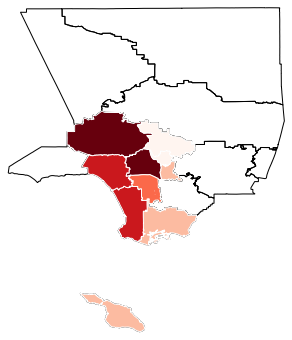

In [146]:
ax = geoplot.choropleth(valuation_by_region, hue="Valuation", cmap="Reds")
geoplot.polyplot(regions, ax = ax)

In [147]:
los_angeles = folium.Map(location = [34.050000, -118.250000], zoom_start=11)

folium.Choropleth(
    geo_data=valuation_by_region,
    name="geometry",
    data=valuation_by_region,
    columns=["name", "Valuation"],
    key_on="feature.properties.name",
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2, 
    smooth_factor=4,
    legend_name="Valuation in Millions"
).add_to(los_angeles)

display(los_angeles)

**Map: KDE plot of permit density in Los Angeles**

In [148]:
permit

NameError: name 'permit' is not defined